# Setup: 

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Get the Data: 

__Downloading the data:__ 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("The train set has {} instances and {} features".format(*train.shape))
print("The test set has {} instances and {} features".format(*test.shape))

The train set has 1460 instances and 81 features
The test set has 1459 instances and 80 features


__Removing the `Id` columns as it is not required in prediction__: 

In [3]:
print("The train data size before dropping ID feature is: ",
     train.shape)
print("The test data size before dropping Id features is: ", 
     test.shape)

# Save the 'Id' column 
train_ID = train["Id"]
test_ID = test["Id"]

# Now, drop the "Id" column sice it's unncessary for the 
# prediction process. 
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Check the data size again after dropping the 
# "Id" variable: 
print("The data size after dropping the Id feature is: ", 
     train.shape)
print("The test data size after dropping the Id feature is: ",
     test.shape)

The train data size before dropping ID feature is:  (1460, 81)
The test data size before dropping Id features is:  (1459, 80)
The data size after dropping the Id feature is:  (1460, 80)
The test data size after dropping the Id feature is:  (1459, 79)


#### Combining the `train` and `test` set as they will require same tranformations: 

In [4]:
data = train.append(test).reset_index(drop = True)
print("The whole dataset has {} instances and {} features".format(*data.shape))

The whole dataset has 2919 instances and 80 features


__Viewing the data__: 

In [5]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Some features are categorical but are present in the dataset as numerical:

In [6]:
# MSSubClass: The Type of Dwelling involved in the Sale is 
# actually a category. 
data["MSSubClass"].replace({
    20: "1-STORY 1946 & NEWER ALL STYLES",
        30:"1-STORY 1945 & OLDER",
        40:"1-STORY W/FINISHED ATTIC ALL AGES",
        45:"1-1/2 STORY - UNFINISHED ALL AGES",
        50:"1-1/2 STORY FINISHED ALL AGES",
        60:"2-STORY 1946 & NEWER",
        70:"2-STORY 1945 & OLDER",
        75:"2-1/2 STORY ALL AGES",
        80:"SPLIT OR MULTI-LEVEL",
        85:"SPLIT FOYER",
        90:"DUPLEX - ALL STYLES AND AGES",
       120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",  
       150:"1-1/2 STORY PUD - ALL AGES",
       160:"2-STORY PUD - 1946 & NEWER",
       180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:"2 FAMILY CONVERSION - ALL STYLES AND AGES",
}, inplace = True)  


# Month Sold is actually a category: 
data["MoSold"].replace({
    1: "Jan", 2:"Feb", 3: "Mar", 4:"Apr", 5: "May", 
    6: "Jun", 7:"Jul", 8: "Aug", 9: "Sep", 10: "Oct",
    11: "Nov", 12: "Dec"
}, inplace = True)

### Splitting the Features into Continuous, Discrete, Ordinal and Nominal, manually: 

#### List of Continuous Variables:

In [7]:
cont_var =  ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
             "TotalBsmtSF", "1stFlrSF","2ndFlrSF",
             "LowQualFinSF", "WoodDeckSF", "OpenPorchSF", 
             "PoolArea", "GarageArea",'GrLivArea', 
             "MasVnrArea","LotArea", 'LotFrontage', 
             '3SsnPorch',  "ScreenPorch",   "MiscVal", 
             "EnclosedPorch", "SalePrice"] 
print("There are", len(cont_var), " continuous features in\
 the feature space.")

There are 20  continuous features in the feature space.


#### List of Discrete Variables: 

In [8]:
disc_var = ["KitchenAbvGr", "BsmtFullBath", "BsmtHalfBath", 
           "FullBath", "HalfBath", 'TotRmsAbvGrd',
            "GarageYrBlt", "GarageCars" , 'YrSold',
            "YearBuilt",'YearRemodAdd','BedroomAbvGr',
            'Fireplaces','OverallCond']   

print("There are", len(disc_var), "discrete variables in\
the feature space.")

There are 14 discrete variables inthe feature space.


#### List of Ordinal Variables: 

In [9]:
ord_var = ['Alley', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 
           'BsmtQual', 'CentralAir',
           'ExterCond', 'ExterQual','Fence', 
           'FireplaceQu', 'Functional','GarageCond', 
           'GarageQual', 'HeatingQC',  'KitchenQual', 
           'LandSlope', 'LotShape',"OverallQual", 
           'PavedDrive', 'PoolQC', 'Street',  'Utilities' 
          ] 
print("There are", len(ord_var), "ordinal features in\
 the feature space.")

There are 23 ordinal features in the feature space.


#### Checking if we left any numerical column: 

In [10]:
set(data.describe().columns) - set(cont_var + disc_var + ord_var)

set()

#### Creating list of all numerical columns: 

In [11]:
num_cols = sorted(set(cont_var + disc_var + ord_var))
print("There are", len(num_cols), "numerical variables in\
 the feature space.")

There are 57 numerical variables in the feature space.


#### Let's make a list of the categorical columns: 

In [12]:
cat_cols = sorted(set(data.columns) - set(num_cols))
print("There are", len(cat_cols), "categorical variables in\
 the feature space.")

There are 23 categorical variables in the feature space.


#### Checking if all categorical variables are `object`: 

In [13]:
(data[cat_cols].dtypes == "object").all()

True

#### Removing the target label from the list of numerical columns

In [14]:
print("There are", len(num_cols), "numerical variables in\
 the feature space.")

There are 57 numerical variables in the feature space.


#### Creating a seperate array of target label: 

In [15]:
target_label = train["SalePrice"]
print("Target label has", target_label.shape[0], " house prices.")

Target label has 1460  house prices.


### Converting Ordinal Features to Integer Values: 

#### Create list of columns relating to condition or quality of the house: 

In [16]:
cond_qual_cols = []

for col in ord_var:
    if ("Cond" in col) or ("Q" in col):
        cond_qual_cols.append(col) 
str(cond_qual_cols)

"['BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu', 'GarageCond', 'GarageQual', 'HeatingQC', 'KitchenQual', 'OverallQual', 'PoolQC']"

#### Removing `OverallQual` from `cond_qual_cols` as it is already in `int` form. 

In [17]:
cond_qual_cols.remove("OverallQual")

#### Printing current `dtype` for all `cond_qual_cols`: 

In [18]:
(data[cond_qual_cols].dtypes == "object").all()

True

#### Converting to `int` values: 

In [19]:
for col in cond_qual_cols:
    data[col].replace({"Ex":5 , "Gd": 4, "TA": 3,
                             "Fa": 2, "Po":1},
                            inplace = True) 

#### Checking if `dtype` for `cond_qual_cols` are real values now: 

In [20]:
(data[cond_qual_cols].apply(np.isreal).all()).all()

True

#### Converting columns relating to basement finish ratings: 

In [21]:
BsmtFin_cols = []
for col in ord_var:
    if "BsmtFin" in col:
        BsmtFin_cols.append(col)
str(BsmtFin_cols)

"['BsmtFinType1', 'BsmtFinType2']"

#### Printing current `dtype` for all `BsmtFin_cols`: 

In [22]:
(train[BsmtFin_cols].dtypes == "object").all()

True

#### Converting to `int` values: 

In [23]:
for col in BsmtFin_cols: 
    data[col].replace({"Unf":1 ,  "LwQ": 2, "Rec": 3,
                             "BLQ": 4, "ALQ":5, "GLQ" :6},
                            inplace = True) 

#### Checking if `dtype` for `BsmtFin_cols` are real values now:

In [24]:
(train[BsmtFin_cols].apply(np.isreal).all()).all()

True

#### Remaining Ordinal Columns: 

In [25]:
remaining_cols = [col for col in ord_var if col not in (cond_qual_cols + BsmtFin_cols)]
str(remaining_cols)

"['Alley', 'BsmtExposure', 'CentralAir', 'Fence', 'Functional', 'LandSlope', 'LotShape', 'OverallQual', 'PavedDrive', 'Street', 'Utilities']"

#### `Alley`: 

In [26]:
data["Alley"].replace({"Grvl":1 , "Pave": 2},
                            inplace = True)  

#### `BsmtExposure`

In [27]:
data["BsmtExposure"].replace({"Gd":4 , "Av": 3, "Mn": 2,
                             "No": 1},
                            inplace = True) 

#### `Fence`: 

In [28]:
data["Fence"].replace({"GdPrv":4 , "MnPrv": 3, 
                               "GdWo": 2, "MnWw": 1},
                            inplace = True)  

#### `Functional`: 

In [29]:
data["Functional"].replace({"Typ":8 , "Min1": 7, "Min2": 6,
                             "Mod": 5, "Maj1":4, "Maj2":3, 
                             "Sev": 2, "Sal": 1},
                            inplace = True)  

#### `LandSlope`: 

In [30]:
data["LandSlope"].replace({"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                          inplace = True)

#### `LotShape`: 

In [31]:
data["LotShape"].replace({"IR3" : 1, "IR2" : 2, "IR1" : 3,
                          "Reg": 4},
                          inplace = True)

#### `PavedDrive`: 

In [32]:
data["PavedDrive"].replace({"N" : 1, "P" : 2, "Y" : 3},
                          inplace = True)

#### `Street`: 

In [33]:
data["Street"].replace({"Grvl" : 1, "Pave" : 2},
                          inplace = True)

#### `Utilities`: 

In [34]:
data["Utilities"].replace({"ELO" : 1, "NoSeWa" : 2, 
                            "NoSewr" : 3, 
                            "AllPub" : 4}, inplace = True)

#### `CentralAir `

In [35]:
data["CentralAir"].replace({"Y":1, 'N':0}, inplace = True)

#### Checking if the values in `remaining_cols` are converted to real values: 

In [36]:
((data[remaining_cols]).apply(np.isreal).all()).all()

True

#### Checking if the values in `num_cols` are converted to real values: 

In [37]:
((data[num_cols]).apply(np.isreal).all()).all()

True

In [38]:
data[num_cols].describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,198.000000,2919.000000,2837.000000,2837.000000,2918.000000,2918.000000,2840.000000,...,1460.000000,2919.000000,2919.000000,2919.000000,2918.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,1.393939,2.860226,3.002820,1.670779,441.423235,49.582248,3.640141,...,180921.195890,16.062350,1.995889,6.451524,1051.777587,3.999314,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.489860,0.822693,0.294506,1.048625,455.610826,169.205611,2.057660,...,79442.502883,56.184365,0.063996,1.569379,440.766258,0.037031,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,34900.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,129975.000000,0.000000,2.000000,5.000000,793.000000,4.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,1.000000,3.000000,3.000000,1.000000,368.500000,0.000000,4.000000,...,163000.000000,0.000000,2.000000,6.000000,989.500000,4.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,2.000000,3.000000,3.000000,2.000000,733.000000,0.000000,6.000000,...,214000.000000,0.000000,2.000000,7.000000,1302.000000,4.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,2.000000,8.000000,4.000000,4.000000,5644.000000,1526.000000,6.000000,...,755000.000000,576.000000,2.000000,15.000000,6110.000000,4.000000,1424.000000,2010.000000,2010.000000,2010.000000


# Visualising, Gaining Insights and Preprocessing : 

#### Creating a copy of the data for exploration purposes:

In [39]:
train_copy = data[:len(train)].copy()
train_copy.shape

(1460, 80)

#### Creating a separate series of target label for convenience: 

In [40]:
y = train_copy["SalePrice"].copy()
y.shape

(1460,)

### Analysing `SalePrice`:  

In [41]:
# Summary of Descriptive Stats: 
pd.DataFrame(y.describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


#### Storing the statistics for convenience: 

In [42]:
sp_mean = train["SalePrice"].mean()
sp_std = train["SalePrice"].std()
sp_min = train["SalePrice"].min()
sp_max = train["SalePrice"].max()
sp_q1 = train["SalePrice"].quantile(0.25)
sp_q3 = train["SalePrice"].quantile(0.75)
sp_median = train["SalePrice"].median()

__Plotting the histogram of `SalePrice`:__

Saving figure SalePrice_histogram


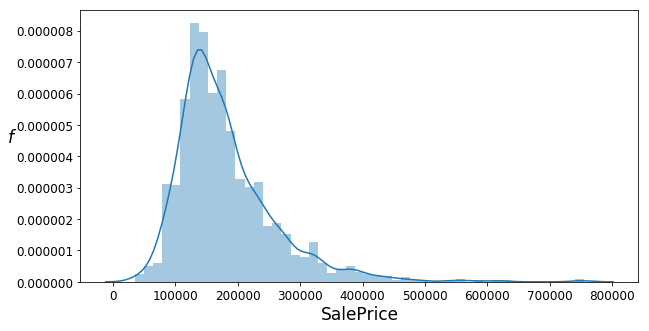

In [43]:
plt.figure(figsize = (10,5))
sns.distplot(y)
plt.xlabel("SalePrice", fontsize = 17)
plt.ylabel(r"$f$", fontsize = 17, rotation = 0)
save_fig("SalePrice_histogram")
plt.show()

#### Checking Skewness on the Target Label: 

In [44]:
y.skew()

1.8828757597682129

__The target label seems to be skewed to the right (positvely skewed). Let's see how it will look if we use log transformation on it__: 

Saving figure Transforming_Target_Label


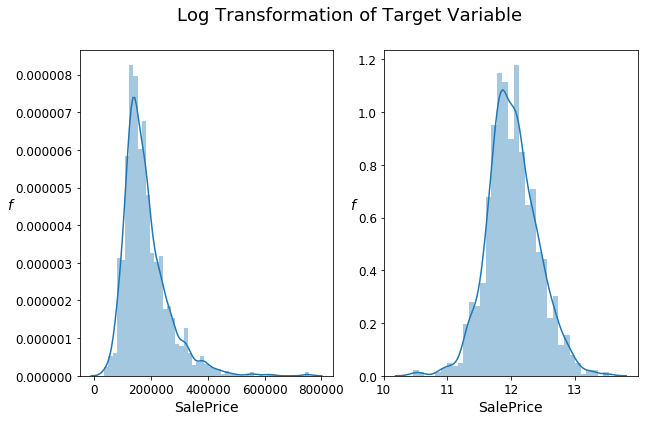

In [45]:
plt.figure(figsize = (10,6))
# Plotting the orginal histogram: 
plt.subplot(121)
sns.distplot(y)
plt.xlabel("SalePrice")
plt.ylabel(r"$f$", rotation = 0)

# Transforming the SalePrice Target Label
y_log = np.log1p(y)

# Plotting the transformed distributions: 
plt.subplot(122)
sns.distplot(y_log)

plt.xlabel("SalePrice")
plt.ylabel(r"$f$", rotation = 0)

plt.suptitle("Log Transformation of Target Variable", 
            fontsize = 18)
save_fig("Transforming_Target_Label")
plt.show()

#### Checking the Skeweness of the target variable after log transformation: 

In [46]:
y_log.skew()

0.12134661989685329

We can see that the skewness has dropped reasonably well. The histogram of `SalePrices` looks almost normal. 

### Looking for Correlations: 

#### Plotting the Correlation Matrix Heatmap: 

Saving figure Correlation_Heatmap_All


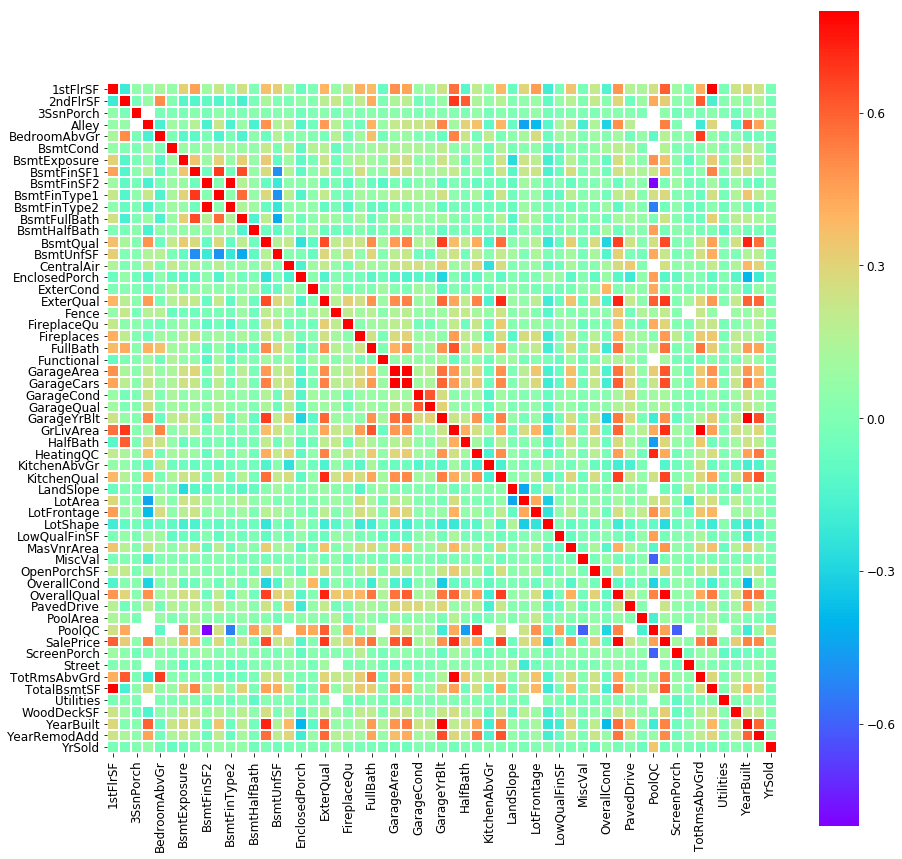

In [47]:
plt.figure(figsize = (15,15))
corr_matrix = train_copy.corr()
sns.heatmap(corr_matrix, vmax = .8, square = True,
           linewidth = 1, cmap="rainbow", annot = False)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
save_fig("Correlation_Heatmap_All")
plt.show()

In [48]:
pd.DataFrame(train.corr()["SalePrice"].sort_values(ascending = False))[:30]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


#### Let's try and work with the most correlated features with the target label: 

In [49]:
# Top Positively Correlated features with SalePrice
top_pos_corr = train_copy.corr()["SalePrice"][train_copy.corr()["SalePrice"] >= 0.5].sort_values(ascending = False).index

# Top Negatively Correlated features with SalePrice
top_neg_corr = train_copy.corr()["SalePrice"][train_copy.corr()["SalePrice"] <= -0.5].sort_values(ascending = True).index

# Top Correlated features with SalePrice
top_corr = top_pos_corr.append(top_neg_corr)
top_corr

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'Alley', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

#### Drawing the correlation heatmap for the `top_corr` features: 

Saving figure Correlation_Heatmap_top_corr


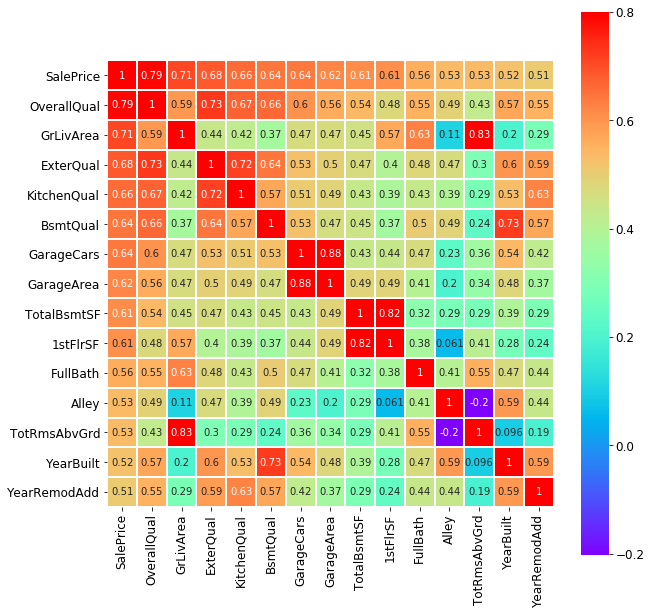

In [50]:
top_corr_matrix = train_copy[top_corr].corr()
plt.figure(figsize = (10,10))
sns.heatmap(top_corr_matrix, vmax = .8, square = True,
           linewidth = 1, cmap="rainbow", annot = True)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
save_fig("Correlation_Heatmap_top_corr")
plt.show()

#### Observations: 
- `SalePrice` is the most correlated with `OverallQual`, `ExterQual` and `GrLivArea`. 
- `OverallQual` is very strongly correlated with `ExterQual`. 
- `GrLivArea` is strongly correlated with `TotRmsAbvGrd`.
- `ExterQual` , `OverallQual` and `KitchenQual` are strongly correlated with each other. 
- `BsmtQual` and `YearBuilt` are strongly correlated with each other.  
- `GarageCars` is strongly correlated with `GarageArea`, vice versa. 
- `TotalBsmtSF` and `1stFlrSF` are strongly correlated with each other. 
- `FullBath`, `Alley` and `YearRemodAdd` are not strongly correlated with any other top feature. 

Therefore, when doing _Bi-Variate Analysis_ for outlier detection , we will consider the following features only: 
- `OverallQual`
- `GrLivArea`
- `BsmtQual`
- `GarageCars`
- `TotalBsmtSF`
- `FullBath`
- `Alley`
- `YearRemodAdd`

#### Plotting `scatter_matrix` for some of the top correlated features: 

Saving figure Scatter_Matrix_SalePrice_attributes


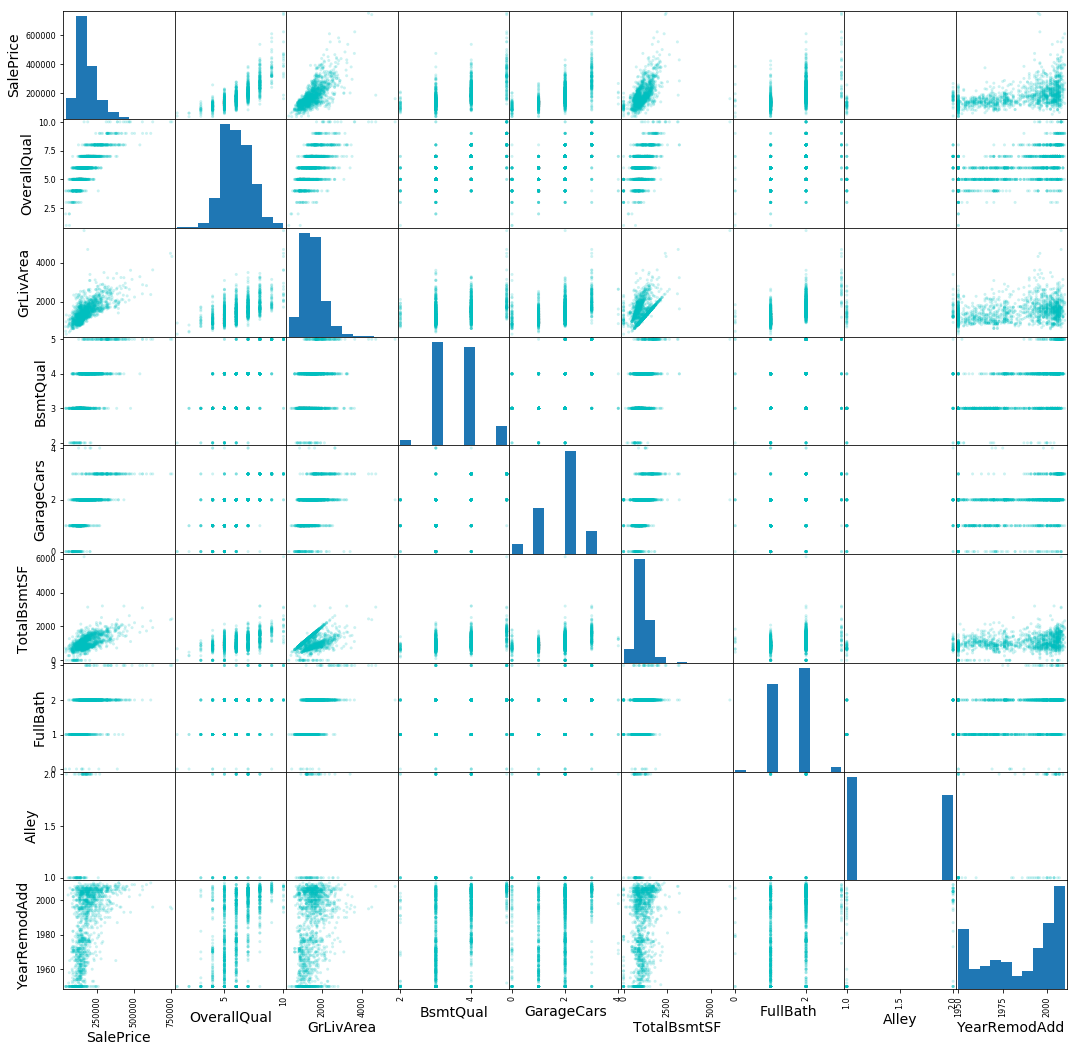

In [51]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "BsmtQual", 
             "GarageCars","TotalBsmtSF", "FullBath", 
             "Alley", "YearRemodAdd"]
scatter_matrix(train_copy[attributes], 
               figsize = (18,18), 
              alpha = 0.2, color = "c")
save_fig("Scatter_Matrix_SalePrice_attributes")
plt.show()

#### Observations:
- `SalePrice` vs `YearRemodAdd` shows a positive trend, but not a exactly a linear positive trend. Prices seem to be suddenly spike for houses that are built after $1990$. 
- As the `GrLivArea` increases, the `OverallQual` seems to increase, which indicates that the bigger the house, the better `OverallQual` rating it has gotten. This is a bit weird. `OverallQual` should not depend so much on how big the house is.   
- There is some correlation between `OverallQual` and `YearRemodAdd` indicating the newer the house, the better it's `OverallQual`. 
- In the `GrLivArea` vs `TotalBsmtSF`, there is a line being formed when we see the plot of `GrLivArea` vs `TotalBsmtSF` showing that a lot of times `GrLivArea` = `TotalBsmtSF`. You can also see the houses where there is no basement (at the bottom, `TotalBsmtSF = 0`). Also, there are no houses which have `GrLivArea` smaller than `TotalBsmtSF`, which makes sense. 
- The `GrLivArea` is also correlated with `FullBath`, which makes sense. As the the number of `FullBath` increase, the `GrLivArea` is also likely to increase. 
- The `GarageCars` is correlated with `OverallQual` incidicating the more the number of cars you can park in your house, the better its `OverallQual`. 
- There is no strong evidence to support that the newer the house (`YearRemodAdd`), the bigger it is (`GrLivArea`/`TotalBsmtSF`), or vice versa. 
- There is some correlation between the `BsmtQual` and `YearRemodAdd` indicating, the newer the house, the better quality basement it has. 

## Missing Data: 

### Visualising Missing Data: 

In [52]:
data_na_cent = ((data.isnull().sum())/len(data))*100
missing_data = data_na_cent.sort_values(ascending = False)
missing_data = pd.DataFrame(missing_data, columns = ["Missing%"])
missing_data[:30]

,Missing%
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


Saving figure Visualising_Missing_Data


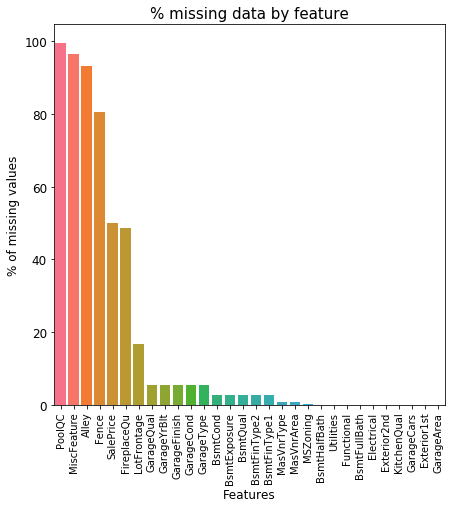

In [53]:
f, ax = plt.subplots(figsize=(7, 7))
plt.xticks(rotation='90', fontsize = 10)
sns.barplot(x=missing_data.index[:30], 
            y=missing_data[:30]["Missing%"],
            palette = "husl", 
           saturation = 1
           )
plt.xlabel('Features', fontsize=12)
plt.ylabel('% of missing values', fontsize=12)
plt.title('% missing data by feature', fontsize=15)
save_fig("Visualising_Missing_Data")
plt.show()

### Numerical Missing Data: 

#### Seeing which numerical columns have missing values: 

In [54]:
missing_num_cols = sorted(data[num_cols].columns[data[num_cols].isnull().any()])
str(missing_num_cols)

"['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MasVnrArea', 'PoolQC', 'SalePrice', 'TotalBsmtSF', 'Utilities']"

__What does each missing feature represent?__   
__How much data is missing from each feature?__   
__What are we going to do about it? __ 

1. `Alley`: No Alley Access, $95\%$ data missing.
    - Treatment: Fill with $0$. 
2. `Bsmt` features: `['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']`: No Basement! 
    - Treatment: Fill with $0$. 
3. `Fence`: No Fence, $80\%$ data missing. 
    - Treatment: Fill with $0$. 
4. `FireplaceQu`: No Fireplace, $50\%$ data missing. 
    - Treatment: Fill with $0$. 
5. `Functional`: Data description says, "Assume typical unless deductions are warranted", only $2$ missing data points. 
    - Treatment: Fill missing values with `Typ` or $8$. 
6. `Garage` features: `['GarageArea', 'GarageCars', 'GarageCond', 'GarageQual', 'GarageYrBlt']`: No Garage.
    - Treatment: Fill with $0$. 
8. `KitchenQual`: No Kitchen? $1$ missing data point. 
    - Treatment: Fill with most occuring value. 
9. `LotFrontage`: $16%$ missing data. 
    - Treatment: `LotFrontage` is the area of each street connected to the house property. It will most likely have a similar area to other houses in its neghbourhood. We will fill in mising values by the median of `LotFrontage` of the neighbourhood.  Thanks to [Seriegne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook)!
10. `MasVnrArea`: No Veneer, $23$ missing data points. 
    - Treatment: Fill with $0$. 
11. `PoolQC`: No Pool, $99\%$ data missing. 
    - Treatment: Fill with $0$. 
12. `Utilities`: $2$ missing data points. 
    - Treatment: See `value_counts()` and fill with most occuring value. 


#### Except `Functional`, `KitchenQual`, `LotFrontage` and `Utilities` , all other missing numerical values are going to be imputed with a 0 as they indicate the absence of an element in the house: 

#### Dealing with missing values in `Functional`: 

In [55]:
data["Functional"] = data["Functional"].fillna(8) # Typical Functionality

In [56]:
# Checking if all missing values were filled. 
data["Functional"].isnull().any()

False

#### Dealing with missing values in `KitchenQual`: 

In [57]:
data["KitchenQual"] = data["KitchenQual"].fillna(data["KitchenQual"].mode()[0], )

In [58]:
# Checking if all missing values were filled. 
data["KitchenQual"].isnull().any()

False

#### Dealing with missing values in `LotFrontage`: 

In [59]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [60]:
# Checking if all missing values were filled. 
data["LotFrontage"].isnull().any()

False

#### Dealing with missing values in `Utilities`: 

In [61]:
# Seeing value counts in Utilities
data["Utilities"].value_counts()

4.0    2916
2.0       1
Name: Utilities, dtype: int64

In [62]:
# Seeing number of missing values in Utilities: 
sum(data["Utilities"].isnull())

2

All, except one value in `Utilities` = $4$. This feature will not help us differentiate between the houses. In other words, this feature does not provide any information gain. 
Therefore, we will delete this feature. 

#### Droping `Utilities`: 

In [63]:
data.drop(["Utilities"], axis = 1, inplace = True)
print("The shape of data after dropping `Utilities` \
feature is:", data.shape)

The shape of data after dropping `Utilities` feature is: (2919, 79)


In [64]:
# Removing "Utilities" from `num_cols`: 
num_cols.remove("Utilities")

#### Filling in remaining numerical values with 0: 

In [65]:
data[num_cols] = data[num_cols].fillna(0)

#### Making sure all numerical columns have been filled: 

In [66]:
(data[num_cols].isnull().any()).all()

False

### Categorical Missing Data: 

In [67]:
missing_cat_cols = sorted(data[cat_cols].columns[data[cat_cols].isnull().any()])
str(missing_cat_cols)

"['Electrical', 'Exterior1st', 'Exterior2nd', 'GarageFinish', 'GarageType', 'MSZoning', 'MasVnrType', 'MiscFeature', 'SaleType']"

__What does each missing feature represent?__   
__How much data is missing from each feature?__   
__What are we going to do about it? __ 

1. `Electrical`: $1$ missing data point. 
    - Treatment: Fill with mode. 
2. `Exterior1st` and `Exterior2nd`: $1$ missing data point. 
    - Treatment: Fill with mode. 
3. `GarageFinish` and `GarageType`: $159$ or $157$ missing data point. 
    - Treatment: Fill with `"None"`
4. `MSZoning`: $4$ missing data points. 
    - Treatment: Fill with mode.  
5. `MasVnrType`: $24$ missing data points. 
    - Treatment: Fill with mode, which in this case is, `"None"`. 
6. `MiscFeature`: More than $95\%$ of the data is missing. 
    - Treatment: Fill with `"None"`. 
8. `SaleType`:  $1$ missing data point. 
    - Treatment: Fill with mode. 

#### Except `GarageFinish`, `GarageType` and `MiscFeature`, all categorical features are going to filled in by their mode. 

#### Dealing with `GarageFinish` , `GarageType` and `MiscFeature`: 

In [68]:
data[["GarageFinish", "GarageType", "MiscFeature"]] = \
data[["GarageFinish", "GarageType", "MiscFeature"]].fillna(
    "None")

In [69]:
# Checking if all missing values were filled. 
data[["GarageFinish", "GarageType", "MiscFeature"]].isnull().any()

GarageFinish    False
GarageType      False
MiscFeature     False
dtype: bool

#### Dealing with rest of categorical missing data (Filling each missing categorical value by the model of its' column): 

In [70]:
data[cat_cols] = data[cat_cols].fillna(
    data[cat_cols].mode().iloc[0])

#### Verifying all categorical values are filled: 

In [71]:
(data[cat_cols].isnull().any()).all()

False

#### Verifying all data is filled: 

In [72]:
(data.isnull().any()).all()

False

## Outlier Detection: 

A convenient defninition of an outlier is a point which falls more than 1.5 times the interquartile range above the the third quartile or below the first quartile. 

### Univaritate Analysis: 

#### Determining certain statistics about the `SalePrice`, needed for outlier detection: 

In [73]:
print("Minimum SalePrice: ", sp_min)
print("Q1: ", sp_q1)
print("Q3: ", sp_q3)
print("Q2 (Median)", sp_median)
print("Mean: ", sp_mean)

sp_iqr = sp_q3 - sp_q1
print("IQR: ", sp_iqr)

print("Maximum SalePrice: ", sp_max)

upper_limit = sp_q3 + (1.5*sp_iqr)
print("Upper Limit for SalePrice:", upper_limit)

lower_limit = sp_q1 - (1.5*sp_iqr)
print("Lower Limit for SalePrice", lower_limit)

Minimum SalePrice:  34900
Q1:  129975.0
Q3:  214000.0
Q2 (Median) 163000.0
Mean:  180921.19589
IQR:  84025.0
Maximum SalePrice:  755000
Upper Limit for SalePrice: 340037.5
Lower Limit for SalePrice 3937.5


#### Finding out `index` and number of outliers in the dataset: 

In [74]:
# Index of outliers above
outliers_above = train_copy["SalePrice"][
    train_copy["SalePrice"] > upper_limit].index

# Index of outliers below
outliers_below = train_copy["SalePrice"][
    train_copy["SalePrice"] < lower_limit].index

print("There are", len(outliers_above),"outliers above Q3.") 
print("There are", len(outliers_below),"outliers below Q1.") 

There are 61 outliers above Q3.
There are 0 outliers below Q1.


As there are no outliers below. Let's concentrate on the outliers above. 

#### Finding % by which each outlier violates the threshold / `upper_limit`: 

In [75]:
outliers = train_copy.loc[outliers_above]
outlier_SalePrice = train_copy.loc[outliers_above, ["SalePrice"]]
outlier_SalePrice["Violation %"] = (outlier_SalePrice/upper_limit)*100
outlier_SalePrice.head()

,SalePrice,Violation %
11,345000.0,101.459398
53,385000.0,113.222806
58,438780.0,129.038709
112,383970.0,112.919899
151,372402.0,109.517921


#### Splitting `index` of outliers into categories: 
- Those which violate the `upper_limit` by $110\%$, by $130\%$, ... and those which violate the threshold by above $170\%$: 

In [76]:
# 100% >= Violation <= 110%
violation_110 = outlier_SalePrice[outlier_SalePrice[
    "Violation %"] <= 110].index

# 110% > Violation <= 130%
violation_130 = outlier_SalePrice[(outlier_SalePrice[
    "Violation %"] > 110) & (outlier_SalePrice[
    "Violation %"] <= 130)].index

# 130% > Violation <= 150%
violation_150 = outlier_SalePrice[(outlier_SalePrice[
    "Violation %"] > 130) & (outlier_SalePrice[
    "Violation %"] <= 150)].index

# 150% > Violation <= 170%
violation_170 = outlier_SalePrice[(outlier_SalePrice[
    "Violation %"] > 150) & (outlier_SalePrice[
    "Violation %"] <= 170)].index

# Violation > 170%
violation_above_170 = outlier_SalePrice[(outlier_SalePrice[
    "Violation %"] > 170)].index

#### Plotting the violations in different colors against `GrLivArea` to get everything in persepective: 

Saving figure Univariate_Analysis_of_SalePrice


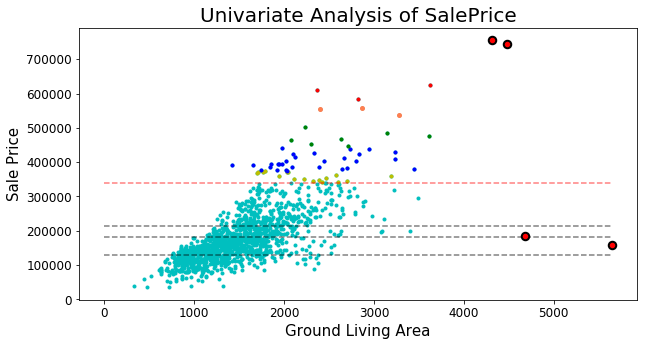

In [77]:
plt.figure(figsize = (10,5))

# Plotting SalePrice vs GrLivArea

### All data points
plt.plot(train_copy["GrLivArea"], 
        train_copy["SalePrice"], "c.")

### Those which violate upper_limit by less than 110
plt.plot(train_copy.loc[violation_110]["GrLivArea"], 
        train_copy["SalePrice"].loc[violation_110], "y.")

### Those which violate upper_limit by less than 130
plt.plot(train_copy.loc[violation_130]["GrLivArea"], 
        train_copy["SalePrice"].loc[violation_130], "b.")

### Those which violate upper_limit by less than 150
plt.plot(train_copy.loc[violation_150]["GrLivArea"], 
        train_copy["SalePrice"].loc[violation_150], "g.")

### Those which violate upper_limit by less than 170
plt.plot(train_copy.loc[violation_170]["GrLivArea"], 
        train_copy["SalePrice"].loc[violation_170],
         linestyle = "none",
         markeredgewidth = 0,
         markerfacecolor = "coral", 
         marker = ".", markersize = 10)
### Those which violate upper_limit by more than 150
plt.plot(train_copy.loc[violation_above_170]["GrLivArea"], 
        train_copy["SalePrice"].loc[violation_above_170], "r.")

# Drawing a black line for mean of "SalePrice"
plt.plot([0, train_copy["GrLivArea"].max()],
     [sp_mean, sp_mean], "k--",
        alpha = 0.5)

# Drawing a black line for third quartile of `SalePrice`
plt.plot([0, train_copy["GrLivArea"].max()],
     [sp_q3, sp_q3], "k--",
        alpha = 0.5)

# Drawing a black line for first quartile of `SalePrice`
plt.plot([0, train_copy["GrLivArea"].max()],
     [sp_q1, sp_q1], "k--",
        alpha = 0.5)

# Draw a Red Line for the upperlimit: 
plt.plot([0, train_copy["GrLivArea"].max()],
     [upper_limit, upper_limit], "r--",
        alpha = 0.5)

# Highlighting points suggested as outliers: 
plt.plot(train_copy[train_copy["GrLivArea"] >= 4000]["GrLivArea"],
        train_copy[train_copy["GrLivArea"] >= 4000]["SalePrice"], 
        "r.", markersize = 15, markeredgecolor="black",
         markeredgewidth = 2)

plt.xlabel("Ground Living Area", fontsize = 15)
plt.ylabel("Sale Price", rotation = 90 , fontsize = 15)
plt.title("Univariate Analysis of SalePrice", fontsize = 20)
save_fig("Univariate_Analysis_of_SalePrice")
plt.show()

#### Observations:  
- The $1399$ points in `cyan` are not outliers. 
- The black-dashed lines represent the $Q1$, $Mean$ and $Q3$ of `SalePrice`. 
- The red-dashed line represents the `upper_limit`. 
- The $17$ points in `yellow` violate the `upper_limit` by less than $110\%$. 
- The $29$ points in `blue` violate the `upper_limit` by less than $130\%$ but greater than $110\%$. 
- The $7$ points in `green` violate the `upper_limit` by less than $150\%$ but greater than $130\%$. 
- The $3$ points in `orange` violate the `upper_limit` by less than $170\%$ but greater than $150\%$. 
- The $5$ points in `red` violate the `upper_limit` greater than $150\%$. 
- There are points which are highlighted with a black marker. These points are suggested to be removed from the training set [by the author](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf). Two of these points are unusual sales (very large houses priced appropriately) and the other two are _partial sales_, which do not represent actual market values.  
> "_I would recommend removing any houses with more than
4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students._"

In [78]:
outliers_remove = train_copy[train_copy["GrLivArea"] >= 4000].index
outliers_remove

Int64Index([523, 691, 1182, 1298], dtype='int64')

#### Removing the suggested outliers: 

In [79]:
data.drop(outliers_remove, axis = 0, inplace = True)

In [80]:
data.shape # Removed 4 observations

(2915, 79)

#### Now, just one observation remains which has a `GrLivArea` $> 4000$: 

In [81]:
data[data["GrLivArea"] >= 4000]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2549,5095,0,0,0.0,2,1Fam,3.0,4.0,4010.0,0.0,...,0.0,New,0,2,15,5095.0,546,2008,2009,2007


This observation belonds to the test set. Therefore, we will not fiddle with it. 

We can think of deleting the observations which exceed the `upper_limit` by more than $150\%$ but there might be such observations in the test set too. So I'm going to let them be. 

#### Removing the outliers from the copy of the target label: 

In [82]:
y.drop(outliers_remove, axis = 0, inplace = True)
y.shape

(1456,)

#### Removing the outliers from the copy of the training set: 

In [83]:
train_copy.drop(outliers_remove, axis = 0, inplace = True)
train_copy.shape

(1456, 80)

### Bi-Variate Analysis: 

#### View list of attributes being used to Bi-Variate Analysis: 

In [84]:
attributes.remove("SalePrice")
str(attributes)

"['OverallQual', 'GrLivArea', 'BsmtQual', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'Alley', 'YearRemodAdd']"

Saving figure Bi_Varitate_Analysis_of_SalePrice


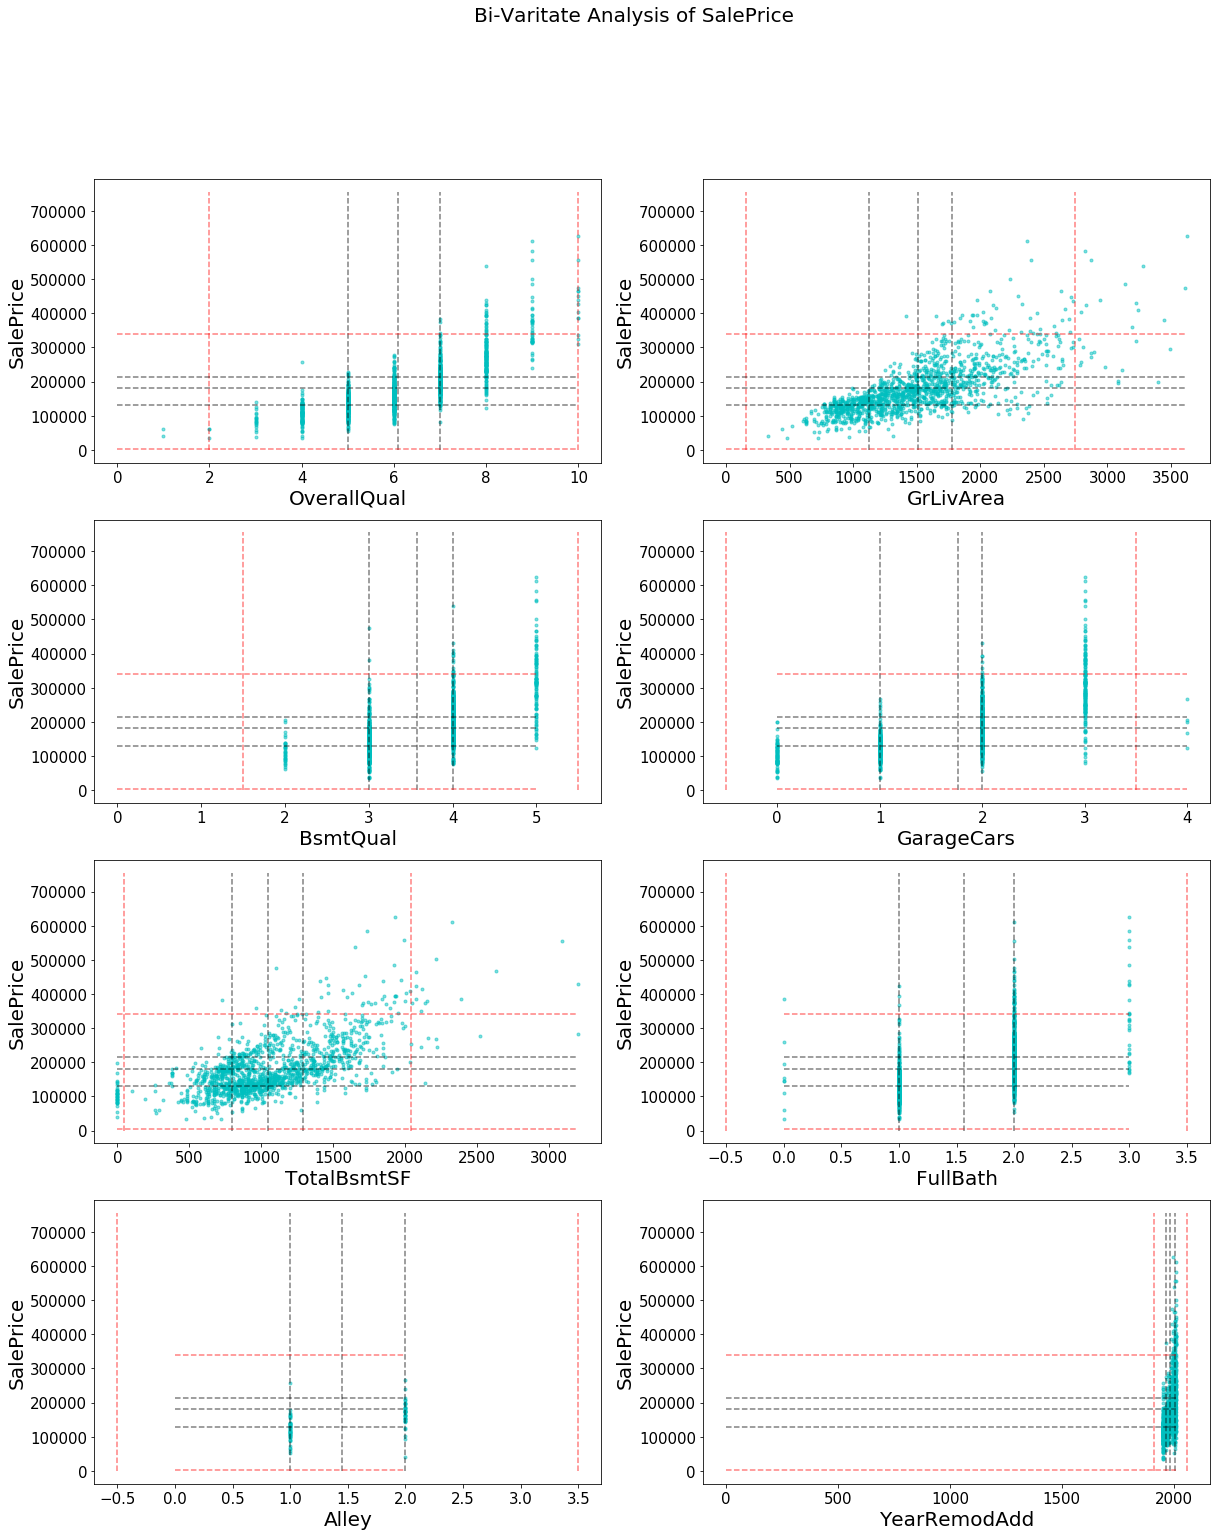

In [85]:
plt.figure(figsize = (20,24))
for col, subplot in zip(attributes,
                        [421, 422, 423, 424, 
                              425, 426, 427, 428]):
    
    plt.subplot(subplot)
    
    # Descriptive Statisitcs about the current columns
    ### Q1
    col_q1 = train_copy[col].quantile(0.25)
    ### Mean
    col_mean = train_copy[col].mean()
    ### Q3
    col_q3 = train_copy[col].quantile(0.75)
    ### IQR
    col_iqr = col_q3 - col_q1
    ### Upper Limit
    col_upper_limit = col_q3 + (1.5*col_iqr)
    ### Lower Limit
    col_lower_limit = col_q1 - (1.5*col_iqr)
    ### Maximum Value
    col_max = train_copy[col].max()
    
    # Plot the column against SalePrice
    plt.plot(train_copy[col], y,
            "c.", alpha = 0.5)
    
    # Plot a horizontal line representing the lower limit
    # of the column
    plt.plot([col_lower_limit,col_lower_limit],
             [0,sp_max], "r--", alpha = 0.5)
    

    # Plot a horizontal line representing the first quartile
    # of the column
    plt.plot([col_q1,col_q1],
             [0,sp_max], "k--", alpha = 0.5)
    
    # Plot a horizontal line representing the mean of 
    # the column
    plt.plot([col_mean,col_mean],
             [0,sp_max], "k--", alpha = 0.5)
    
    # Plot a horizontal line representing the third quartile
    # of the column
    plt.plot([col_q3,col_q3],
            [0,sp_max], "k--", alpha = 0.5)
    

    # Plot a horizontal line representing the upper limit
    # of the column
    plt.plot([col_upper_limit,col_upper_limit],
             [0,sp_max], "r--", alpha = 0.5)


    # Plot a vertical line representing the lower limit
    # of the SalePrice
    plt.plot([0, col_max],
         [lower_limit, lower_limit], "r--",
            alpha = 0.5)
    
    # Plot a vertical line representing the first quartile
    # of the `SalePrice`
    plt.plot([0, col_max],
         [sp_q1, sp_q1], "k--",
            alpha = 0.5)
    
    # Plot a vertical line representing the mean
    # of the `SalePrice`
    plt.plot([0, col_max],
         [sp_mean, sp_mean], "k--",
            alpha = 0.5)
    
    # Plot a vertical line representing the third quartile
    # of the `SalePrice`
    plt.plot([0, col_max],
         [sp_q3, sp_q3], "k--",
            alpha = 0.5)
    

    # Plot a vertical line representing the upper limit
    # of the SalePrice
    plt.plot([0, col_max],
         [upper_limit, upper_limit], "r--",
            alpha = 0.5)
    
    # Formatting Details: 
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(col, fontsize = 20)
    plt.ylabel("SalePrice", fontsize = 20)
    
plt.suptitle("Bi-Varitate Analysis of SalePrice", 
             fontsize = 20)
save_fig("Bi_Varitate_Analysis_of_SalePrice")
plt.show()

#### Observations: 
- `OverallQuality`: 
    - This seems about right, follows a linear positive trend.
- `BsmtQual`: 
    - Shows a clear positive trend. The better the quality of the basement, the more expensive the house is.  
- `TotalBsmtSF`: 
    - Shows a linear positive trend. 
    - You can see the houses, which do not have a basement don't go beyond $200,000$ $USD$.  
    - Houses that have `TotalBsmtSF` more than $3000$ square footage show that increasing the basement square footage beyond 2000 square feet does not contribute much to increase in the price.  
- `FullBath`:
    - The more number of bathrooms, the costlier the house. 
    - Seems to follow a linear positive trend. 
- `GarageCars`: 
    - The instances which have `GarageCars` $= 4$, seem like outliers to me as they do not follow the trend. 
    - They have price much lesser than the houses which have `GarageCars` $=2$. 
    - Then again, they might be too small or very old. 
- `Alley`: 
    - The better the alley, the more the price of the house. 
    - This is not quite visible from the diagram of alley vs selling price. Maybe there are other factors affecting this.

#### For now, we are going not going to delete any more outliers.  

### Feature Engineering:  
Now, we will create some new features. We will then see how well they do on the using the training set only. Then, we will add the features which do well on the whole data.   
I would like to thank [juliencs](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset) whose kernel was amazing on feature engineering. 

#### Simplifying Existing Features: 
> "_As a group, the 23 ordinal variables present special difficulties. Almost all
of these variables are quality related, with the expectation that higher categories should yield a
coefficient at or above the previous category. In some of my initial modeling, I found that the
estimated coefficients for a number of these categories did not follow this rule, likely due to
interrelations with other variables within the model. While not incorrect, this situation leads to
confusing interpretations (lower quality is better?) for the students. I found that some of these
anomalies could be remedied by collapsing some of the larger five and ten point quality scales
into fewer categories. _"

__List of Ordinal Variables:__ 

In [86]:
ord_var.remove("Utilities")
str(ord_var)

"['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageQual', 'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape', 'OverallQual', 'PavedDrive', 'PoolQC', 'Street']"

#### Making another copy of the training set which has all missing values, filled. 

In [87]:
train_copy = data.loc[:len(train_copy)].copy()
print("The number of features in copied training set are: ",\
      train_copy.shape[1]-1)

The number of features in copied training set are:  78


#### The following columns will be simplified as they have $>=4$ categories: 
- All `BsmtFin_cols`
- All `cond_qual_cols`
- `Functional`  
We will let `Fence` and `LotShape` be the way they are as they have 4-5 nicely differentiated categories. 

#### The `BsmtFin` features have 6 categories. Dumbing it down to three categories: 

In [88]:
for col in BsmtFin_cols: 
    train_copy["Simple"+str(col)] = train_copy[col].replace({
        1:1 ,2:1, # Unfinished or LowQual
        3:2,4:2, # Average Rec Room or Below Average Living Quarter
        5:3, 6:3} # Average/Good Living Quarters
    ) 

for col in BsmtFin_cols: 
    print(train_copy["Simple"+str(col)].value_counts())
    
print("The number of features in copied training set are: ",\
      train_copy.shape[1]-1)

3.0    632
1.0    504
2.0    280
0.0     37
Name: SimpleBsmtFinType1, dtype: int64
1.0    1296
2.0      86
0.0      38
3.0      33
Name: SimpleBsmtFinType2, dtype: int64
The number of features in copied training set are:  80


#### The `Cond` and `Qual` feature have 5 categories. Dumbing it down to three categories: 

In [89]:
for col in cond_qual_cols:
    train_copy["Simple" + str(col)] = train_copy[col].replace(
        {5.000:3 , 4.000:3, #Good
         3.000:2, #Average
        2.000:1, 1.000:1 # bad
        })
    
for col in cond_qual_cols:
    print(train_copy["Simple" + str(col)].value_counts() )
    
print("The number of features in copied training set are: ",\
      train_copy.shape[1]-1)

2.0    1305
3.0      64
1.0      47
0.0      37
Name: SimpleBsmtCond, dtype: int64
3.0    735
2.0    646
0.0     37
1.0     35
Name: SimpleBsmtQual, dtype: int64
2    1276
3     148
1      29
Name: SimpleExterCond, dtype: int64
2    905
3    534
1     14
Name: SimpleExterQual, dtype: int64
0.0    688
3.0    400
2.0    312
1.0     53
Name: SimpleFireplaceQu, dtype: int64
2.0    1319
0.0      81
1.0      42
3.0      11
Name: SimpleGarageCond, dtype: int64
2.0    1304
0.0      81
1.0      51
3.0      17
Name: SimpleGarageQual, dtype: int64
3    975
2    428
1     50
Name: SimpleHeatingQC, dtype: int64
2.0    734
3.0    680
1.0     39
Name: SimpleKitchenQual, dtype: int64
0.0    1448
3.0       3
1.0       2
Name: SimplePoolQC, dtype: int64
The number of features in copied training set are:  90


#### The `OverallCond` column has 10 categories. Dumbing it down to three: 

In [90]:
train_copy["SimpleOverallCond"] = train_copy["OverallCond"].replace({
    1:1 , 2:1, 3:1, # bad
    4:2, 5:2, 6:2, # average
    7:3, 8:3, 9:3, 10:3  # good
})
train_copy["SimpleOverallCond"].value_counts()

print("The number of features in copied training set are: ",\
      train_copy.shape[1]-1)

The number of features in copied training set are:  91


#### The `OverallQual` column has 10 categories. Dumbing it down to three: 

In [91]:
train_copy["SimpleOverallQual"] = train_copy["OverallQual"].replace({
    1:1 , 2:1, 3:1, # bad
    4:2, 5:2, 6:2, # average
    7:3, 8:3, 9:3, 10:3  # good
})
train_copy["SimpleOverallQual"].value_counts()

print("The number of features in copied training set are: ",\
      train_copy.shape[1]-1)

The number of features in copied training set are:  92


#### The `Functional` feature has 8 categories. Dumbing it down to three categories. 

In [92]:
train_copy["SimpleFunctional"] = train_copy["Functional"].replace(
    {8:3 ,7:3, 6:3, # Typical or minor deductions
    5:2, 4:2, 3:2, # Moderate/Major Deductions
    2:1,  1:1 # Severely Damaged/Salvage Only
    })
train_copy["SimpleFunctional"].value_counts()

print("The number of features in copied training set are: ",\
      train_copy.shape[1]-1)

The number of features in copied training set are:  93


#### Combining Existing Features:  
There seems to be a lot of features describing just one aspect of the house. Let's try and combine them.

The difference between condition and quality is that a _quality defect_ is permanent. A _condition defect_ can be repaired.   
When we combine the features describing the quality and condition of one aspect of the house, we get a good idea of that particular aspect of the house. 

In [93]:
# Overall State of Exterior
train_copy["ExterState"] = train_copy["ExterCond"]*train_copy["ExterQual"]

# Overall State of Basement: 
train_copy["BsmtState"] = train_copy["BsmtCond"]*train_copy["BsmtQual"]

# Overall State 
train_copy["OverallState"] = train_copy["OverallQual"] * train_copy["OverallCond"]

# Overall State of Garage
train_copy["GarageState"] = train_copy["GarageCond"]*train_copy["GarageQual"]

print("The number of features in copied training set are: ",\
      train_copy.shape[1]-1)

The number of features in copied training set are:  97


#### Combining all `State` features: 

In [94]:
train_copy["Agg_State"] = train_copy["BsmtState"] + \
train_copy["ExterState"] + train_copy["GarageState"] + \
train_copy["OverallState"] 

print("The number of features in copied train_copy_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copy_copying set are:  98


#### Combining Area/Number of with Quality: 

In [95]:
# Overall Kitchen Score
train_copy["KitchenScore"] = train_copy["KitchenAbvGr"]*train_copy["KitchenQual"]

# Overall Garage Score
train_copy["GarageScore"] = train_copy["GarageCars"] * train_copy["GarageQual"]

# Overall Fireplace Score: 
train_copy["FireplaceScore"] = train_copy["Fireplaces"]*train_copy["FireplaceQu"]

# Overall Pool Score
train_copy["PoolScore"] = train_copy["PoolArea"] * train_copy["PoolQC"]

# Overall Basment Score: 
train_copy["BsmtScore"] = train_copy["TotalBsmtSF"]*train_copy["BsmtQual"]

print("The number of features in copied train_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copying set are:  103


#### Combining all `Score` Features: 

In [96]:
train_copy["Agg_Score"] = train_copy["KitchenScore"] + \
train_copy["FireplaceScore"] + train_copy["GarageScore"] + \
train_copy["PoolScore"] + train_copy["BsmtScore"]  

print("The number of features in copied train_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copying set are:  104


#### Combining Area/Number of with SimpleQuality: 

In [97]:
# Overall SimpleKitchen Score
train_copy["SimpleKitchenScore"] = train_copy["KitchenAbvGr"]*train_copy["SimpleKitchenQual"]

# Overall SimpleFireplace Score: 
train_copy["SimpleFireplaceScore"] = train_copy["Fireplaces"]*train_copy["SimpleFireplaceQu"]

# Overall SimpleGarage Score
train_copy["SimpleGarageScore"] = train_copy["GarageArea"] * train_copy["SimpleGarageQual"]

# Overall SimplePool Score
train_copy["SimplePoolScore"] = train_copy["PoolArea"] * train_copy["SimplePoolQC"]

# Overall SimpleBasment Score: 
train_copy["SimpleBsmtScore"] = train_copy["TotalBsmtSF"]*train_copy["SimpleBsmtQual"]

print("The number of features in copied train_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copying set are:  109


#### Combining all `Bath` space-variables to create `TotalBath`: 

In [98]:
train_copy["TotalBath"] = train_copy["BsmtFullBath"] + \
(0.5*train_copy["BsmtHalfBath"]) + train_copy["FullBath"] + \
(0.5*train_copy["HalfBath"])

print("The number of features in copied train_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copying set are:  110


#### Combinig basement, ground, 1st and 2nd floor square footage to create `TotalSF`: 

In [99]:
train_copy["TotalSF"] = train_copy["TotalBsmtSF"] + \
train_copy["GrLivArea"] + train_copy["1stFlrSF"] + \
train_copy["2ndFlrSF"]

print("The number of features in copied train_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copying set are:  111


#### Combining all `Porch` related square footage to get `TotalPorchSF`: 

In [100]:
train_copy["TotalPorchSF"] = train_copy["OpenPorchSF"] + \
train_copy["EnclosedPorch"] + train_copy["3SsnPorch"] + \
train_copy["ScreenPorch"]

print("The number of features in copied train_copy_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copy_copying set are:  112


#### Calculating bedrooms/rooms in the house: 

In [101]:
train_copy["Bdroom/RoomAbvGrd"] = train_copy["BedroomAbvGr"]/train_copy["TotRmsAbvGrd"]
print("The number of features in copied train_copy_copying set are: ",\
      train_copy.shape[1]-1)

The number of features in copied train_copy_copying set are:  113


#### Finding out which features did well (above 0.5 or below -0.5): 

In [102]:
### Create list of features added uptill now
new_features_added = train_copy.columns[-36:] # 114 - 78 = 36
str(new_features_added)

"Index(['YrSold', 'SimpleBsmtFinType1', 'SimpleBsmtFinType2', 'SimpleBsmtCond',\n       'SimpleBsmtQual', 'SimpleExterCond', 'SimpleExterQual',\n       'SimpleFireplaceQu', 'SimpleGarageCond', 'SimpleGarageQual',\n       'SimpleHeatingQC', 'SimpleKitchenQual', 'SimplePoolQC',\n       'SimpleOverallCond', 'SimpleOverallQual', 'SimpleFunctional',\n       'ExterState', 'BsmtState', 'OverallState', 'GarageState', 'Agg_State',\n       'KitchenScore', 'GarageScore', 'FireplaceScore', 'PoolScore',\n       'BsmtScore', 'Agg_Score', 'SimpleKitchenScore', 'SimpleFireplaceScore',\n       'SimpleGarageScore', 'SimplePoolScore', 'SimpleBsmtScore', 'TotalBath',\n       'TotalSF', 'TotalPorchSF', 'Bdroom/RoomAbvGrd'],\n      dtype='object')"

In [103]:
### Create correlation series for `SalePrice`
train_sp_corr = train_copy.corr()["SalePrice"].sort_values(ascending = False)
train_sp_corr.head(10)

SalePrice            1.000000
TotalSF              0.811012
OverallQual          0.800776
Agg_Score            0.768689
BsmtScore            0.767091
SimpleBsmtScore      0.740210
GrLivArea            0.720140
ExterQual            0.695216
Agg_State            0.685671
SimpleOverallQual    0.675785
Name: SalePrice, dtype: float64

In [104]:
### Index into the correlation series of `SalePrice` to 
### see how well the new features have done
train_sp_corr_new = train_sp_corr.loc[new_features_added].sort_values(ascending = False)
train_sp_corr_new.head(10)

TotalSF              0.811012
Agg_Score            0.768689
BsmtScore            0.767091
SimpleBsmtScore      0.740210
Agg_State            0.685671
SimpleOverallQual    0.675785
GarageScore          0.661447
SimpleGarageScore    0.638625
TotalBath            0.636597
SimpleExterQual      0.628817
Name: SalePrice, dtype: float64

In [105]:
### Create list of features which have more than or equal to
###  0.5 positve correlation with `SalePrice`
positive_keep = train_sp_corr_new[train_sp_corr_new >= 0.5].index
str(list(positive_keep))

"['TotalSF', 'Agg_Score', 'BsmtScore', 'SimpleBsmtScore', 'Agg_State', 'SimpleOverallQual', 'GarageScore', 'SimpleGarageScore', 'TotalBath', 'SimpleExterQual', 'ExterState', 'BsmtState', 'SimpleKitchenQual', 'OverallState', 'SimpleFireplaceQu', 'SimpleBsmtQual', 'FireplaceScore', 'SimpleFireplaceScore']"

In [106]:
### Create list of features which have less than or equal to
###  -0.5 negative correlation with `SalePrice`. 
negative_keep = train_sp_corr_new[train_sp_corr_new <= -0.5].index
str(list(negative_keep))

'[]'

In [107]:
### Create final list of features to be added to data. 
new_features = list(positive_keep) + list(negative_keep)
str(new_features)

"['TotalSF', 'Agg_Score', 'BsmtScore', 'SimpleBsmtScore', 'Agg_State', 'SimpleOverallQual', 'GarageScore', 'SimpleGarageScore', 'TotalBath', 'SimpleExterQual', 'ExterState', 'BsmtState', 'SimpleKitchenQual', 'OverallState', 'SimpleFireplaceQu', 'SimpleBsmtQual', 'FireplaceScore', 'SimpleFireplaceScore']"

In [108]:
### Create list of engineered features which did not 
### work well. 
drop_new_features = set(new_features_added) - set(new_features)
str(list(drop_new_features))

"['SimplePoolQC', 'SimpleKitchenScore', 'SimplePoolScore', 'SimpleGarageQual', 'SimpleHeatingQC', 'SimpleBsmtCond', 'SimpleBsmtFinType1', 'SimpleFunctional', 'TotalPorchSF', 'SimpleBsmtFinType2', 'SimpleOverallCond', 'SimpleGarageCond', 'SimpleExterCond', 'YrSold', 'PoolScore', 'GarageState', 'Bdroom/RoomAbvGrd', 'KitchenScore']"

In [109]:
print("Right now, the data has", data.shape[1], "features.")
print("The `new_features` length is", len(new_features), ".")
print("This means, the dataset will have ", \
      data.shape[1] + len(new_features), "features after \
      adding the new features!")

Right now, the data has 79 features.
The `new_features` length is 18 .
This means, the dataset will have  97 features after       adding the new features!


#### Creating the new features for the whole dataset: 

In [110]:
## TotalSF
data["TotalSF"] = data["TotalBsmtSF"] + \
data["GrLivArea"] + data["1stFlrSF"] + \
data["2ndFlrSF"]

##### Score Variables used to make `Agg_Score`
##### Overall Kitchen Score
data["KitchenScore"] = data["KitchenAbvGr"]*data["KitchenQual"]

##### Overall Garage Score
data["GarageScore"] = data["GarageCars"] * data["GarageQual"]

##### Overall Fireplace Score: 
data["FireplaceScore"] = data["Fireplaces"]*data["FireplaceQu"]

##### Overall Pool Score
data["PoolScore"] = data["PoolArea"] * data["PoolQC"]

##### Overall Basment Score: 
data["BsmtScore"] = data["TotalBsmtSF"]*data["BsmtQual"]

## Agg_Score
data["Agg_Score"] = data["KitchenScore"] + \
data["FireplaceScore"] + data["GarageScore"] + \
data["PoolScore"] + data["BsmtScore"]  

#### Creating Simple QualCond Features: 
for col in cond_qual_cols:
    data["Simple" + str(col)] = data[col].replace(
        {5.000:3 , 4.000:3, #Good
         3.000:2, #Average
        2.000:1, 1.000:1 # bad
        })


## Overall SimpleBasment Score: 
data["SimpleBsmtScore"] = data["TotalBsmtSF"]*data["SimpleBsmtQual"]


##### State variables used to create `Agg_State`
##### Overall State of Exterior
data["ExterState"] = data["ExterCond"]*data["ExterQual"]

##### Overall State of Basement: 
data["BsmtState"] = data["BsmtCond"]*data["BsmtQual"]

##### Overall State 
data["OverallState"] = data["OverallQual"] * data["OverallCond"]

##### Overall State of Garage
data["GarageState"] = data["GarageCond"]*data["GarageQual"]

## Agg_State
data["Agg_State"] = data["BsmtState"] + \
data["ExterState"] + data["GarageState"] + \
data["OverallState"] 

## SimpleOverallQual
data["SimpleOverallQual"] = data["OverallQual"].replace({
    1:1 , 2:1, 3:1, # bad
    4:2, 5:2, 6:2, # average
    7:3, 8:3, 9:3, 10:3  # good
})

## Overall SimpleGarage Score
data["SimpleGarageScore"] = data["GarageArea"] * data["SimpleGarageQual"]

## TotalBath
data["TotalBath"] = data["BsmtFullBath"] + \
(0.5*data["BsmtHalfBath"]) + data["FullBath"] + \
(0.5*data["HalfBath"]) 

## Overall SimpleFireplace Score: 
data["SimpleFireplaceScore"] = data["Fireplaces"]*data["SimpleFireplaceQu"]


#### Making sure we did not leave out any of the new features to be added: 

In [111]:
for col in new_features:
    if col not in data.columns:
        print(col)

#### Making sure we have not added any of the new features that are not required: 

In [112]:
drop_features = []
for col in drop_new_features:
    if col in data.columns:
        drop_features.append(col)
drop_features

['SimplePoolQC',
 'SimpleGarageQual',
 'SimpleHeatingQC',
 'SimpleBsmtCond',
 'SimpleGarageCond',
 'SimpleExterCond',
 'YrSold',
 'PoolScore',
 'GarageState',
 'KitchenScore']

In [113]:
data.drop(drop_features, axis = 1, inplace = True)

In [114]:
print("The dataset now has ", data.shape[1], "features. Worked just right!")

The dataset now has  96 features. Worked just right!


### Analysing Skewness: 

#### Creating categorical features: 

In [115]:
cat_features = data.select_dtypes(include = ["object"]).columns
print("There are", len(cat_features), "categorical features \
in the dataset.")
data[cat_features].head()


There are 23 categorical features in the dataset.


,BldgType,Condition1,Condition2,Electrical,Exterior1st,Exterior2nd,Foundation,GarageFinish,GarageType,Heating,...,MSSubClass,MSZoning,MasVnrType,MiscFeature,MoSold,Neighborhood,RoofMatl,RoofStyle,SaleCondition,SaleType
0,1Fam,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,RFn,Attchd,GasA,...,2-STORY 1946 & NEWER,RL,BrkFace,None,Feb,CollgCr,CompShg,Gable,Normal,WD
1,1Fam,Feedr,Norm,SBrkr,MetalSd,MetalSd,CBlock,RFn,Attchd,GasA,...,1-STORY 1946 & NEWER ALL STYLES,RL,None,None,May,Veenker,CompShg,Gable,Normal,WD
2,1Fam,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,RFn,Attchd,GasA,...,2-STORY 1946 & NEWER,RL,BrkFace,None,Sep,CollgCr,CompShg,Gable,Normal,WD
3,1Fam,Norm,Norm,SBrkr,Wd Sdng,Wd Shng,BrkTil,Unf,Detchd,GasA,...,2-STORY 1945 & OLDER,RL,None,None,Feb,Crawfor,CompShg,Gable,Abnorml,WD
4,1Fam,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,RFn,Attchd,GasA,...,2-STORY 1946 & NEWER,RL,BrkFace,None,Dec,NoRidge,CompShg,Gable,Normal,WD


In [116]:
num_features = data.select_dtypes(exclude = ["object"]).columns
print("There are", len(num_features), "numerical features \
in the dataset.")
data[num_features].head()

There are 73 numerical features in the dataset.


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SimpleKitchenQual,SimpleBsmtScore,ExterState,BsmtState,OverallState,Agg_State,SimpleOverallQual,SimpleGarageScore,TotalBath,SimpleFireplaceScore
0,856,854,0,0.0,3,3.0,1.0,706.0,0.0,6.0,...,3.0,2568.0,12,12.0,35,68.0,3,1096.0,3.5,0.0
1,1262,0,0,0.0,3,3.0,4.0,978.0,0.0,5.0,...,2.0,3786.0,9,12.0,48,78.0,2,920.0,2.5,2.0
2,920,866,0,0.0,3,3.0,2.0,486.0,0.0,6.0,...,3.0,2760.0,12,12.0,35,68.0,3,1216.0,3.5,2.0
3,961,756,0,0.0,3,4.0,1.0,216.0,0.0,5.0,...,3.0,1512.0,9,12.0,35,65.0,3,1284.0,2.0,3.0
4,1145,1053,0,0.0,4,3.0,3.0,655.0,0.0,6.0,...,3.0,3435.0,12,12.0,40,73.0,3,1672.0,3.5,2.0


#### Dropping `SalePrice` from `num_features`: 

In [117]:
num_features = num_features.drop("SalePrice")
print("There are", len(num_features), "numerical features \
in the dataset after dropping the target label.")

There are 72 numerical features in the dataset after dropping the target label.


#### Creating another copy of the training data: 

In [118]:
train_copy = data[:1456]
train_copy.shape

(1456, 96)

#### Creating a series `skewed`: 
- It will have details of features skewed in either direction by more than or equal to $0.5$. 

In [119]:
train_copy_num = train_copy[num_features]
skewed = \
train_copy_num.skew()[np.abs(train_copy_num.skew()) >= 0.5].sort_values(ascending = False)
skewed.head()

MiscVal      24.443364
PoolQC       19.530759
PoolArea     17.522613
LotArea      12.587561
3SsnPorch    10.289866
dtype: float64

#### Make a list of the `skewed_features`'s names: 

In [120]:
skewed_features = list(skewed.index)
str(skewed_features)

"['MiscVal', 'PoolQC', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr', 'Alley', 'BsmtFinSF2', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinType2', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'Fence', 'WoodDeckSF', 'LotFrontage', 'ExterCond', 'BsmtScore', 'Agg_Score', 'BsmtExposure', 'BsmtUnfSF', 'SimpleFireplaceScore', '1stFlrSF', 'FireplaceScore', 'GrLivArea', 'ExterQual', 'ExterState', 'SimpleBsmtScore', '2ndFlrSF', 'BsmtFinSF1', 'OverallCond', 'TotalSF', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFullBath', 'HeatingQC', 'YearBuilt', 'BsmtState', 'SimpleBsmtQual', 'LotShape', 'BsmtQual', 'GarageQual', 'PavedDrive', 'GarageCond', 'CentralAir', 'BsmtCond', 'GarageYrBlt', 'LandSlope', 'Functional', 'Street']"

In [121]:
print("There are ", len(skewed_features), "skewed features \
on which log transformation needs to be applied.")

There are  53 skewed features on which log transformation needs to be applied.


### Applying log transformation to skewed features: 

In [122]:
### Creating a copy of the data so that the original data is
### not changed. 
log_tr_data = data.copy()

### Dropping target label
log_tr_data = log_tr_data.drop("SalePrice", axis = 1)

### Log Transforming the skewed features: 
log_tr_data[skewed_features] = np.log1p(
    log_tr_data[skewed_features])

log_tr_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SimpleKitchenQual,SimpleBsmtScore,ExterState,BsmtState,OverallState,Agg_State,SimpleOverallQual,SimpleGarageScore,TotalBath,SimpleFireplaceScore
0,6.753438,6.751101,0.0,0.0,3,1Fam,1.386294,0.693147,6.561031,0.0,...,3.0,7.851272,2.564949,2.564949,35,68.0,3,1096.0,3.5,0.000000
1,7.141245,0.000000,0.0,0.0,3,1Fam,1.386294,1.609438,6.886532,0.0,...,2.0,8.239329,2.302585,2.564949,48,78.0,2,920.0,2.5,1.098612
2,6.825460,6.765039,0.0,0.0,3,1Fam,1.386294,1.098612,6.188264,0.0,...,3.0,7.923348,2.564949,2.564949,35,68.0,3,1216.0,3.5,1.098612
3,6.869014,6.629363,0.0,0.0,3,1Fam,1.609438,0.693147,5.379897,0.0,...,3.0,7.321850,2.302585,2.564949,35,65.0,3,1284.0,2.0,1.386294
4,7.044033,6.960348,0.0,0.0,4,1Fam,1.386294,1.386294,6.486161,0.0,...,3.0,8.142063,2.564949,2.564949,40,73.0,3,1672.0,3.5,1.098612


### Visualising Log Transformation of Skewed Features: 

#### Choosing a random subset of `skewed_features` to show the transformation: 

Saving figure Visualising_Log_Transformation


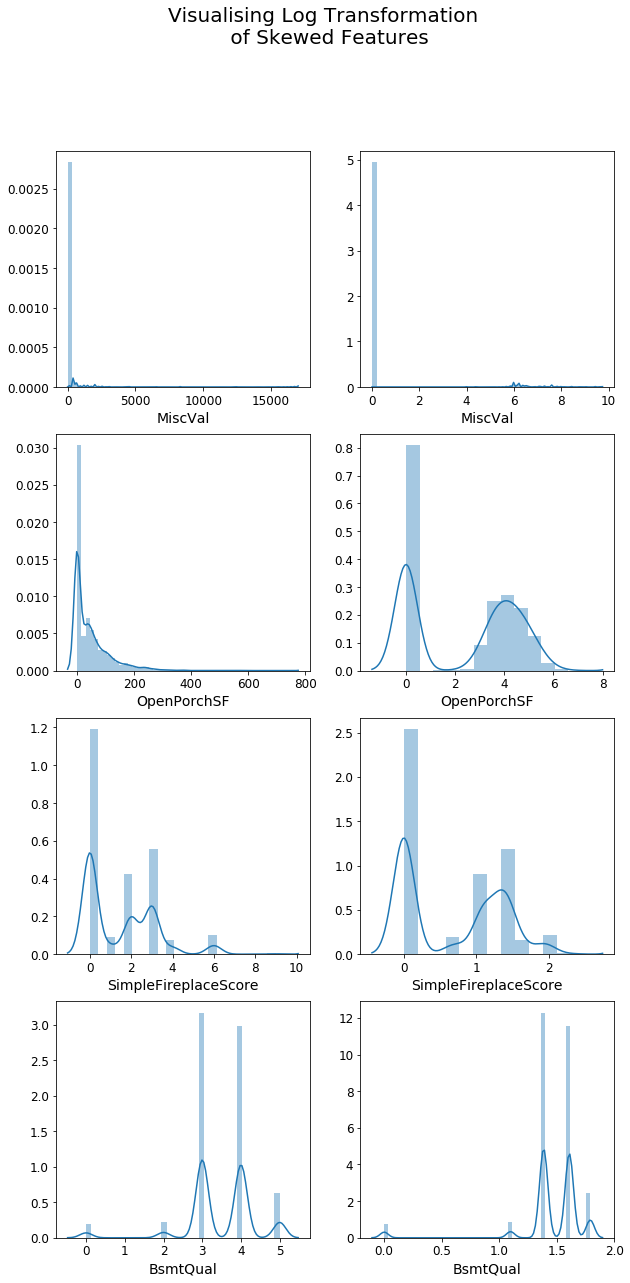

In [123]:
some_skewed = ["MiscVal", "OpenPorchSF","SimpleFireplaceScore", 
               "BsmtQual"]
plt.figure(figsize = (10,20))
for col, subplot in zip(some_skewed,[421,423,425,427]):
    plt.subplot(subplot)
    sns.distplot(data[col])

for col, subplot in zip(some_skewed,[422,424,426,428]):
    plt.subplot(subplot) 
    sns.distplot(log_tr_data[col])
plt.suptitle("Visualising Log Transformation \n \
of Skewed Features", fontsize = 20)
save_fig("Visualising_Log_Transformation")
plt.show()

### Creating Dummy Variables for Categorical Values via `one-hot encoding`: 

In [124]:
print("There are currently", log_tr_data.shape[1], "\
features in the dataset, including the target label.")
print("There are", len(cat_features), "categorical features \
in the dataset.")
print("The total number of categories from each categorical \
features is:")
total_dummy = np.sum(log_tr_data[cat_features].apply(lambda x: x.nunique()))
print(total_dummy)
print("Therefore, we should be expecting ", len(num_features),
     "(numerical features) +", total_dummy, " one-hot\
     encoded feature = ", len(num_features) + total_dummy,
     "features in total.")

There are currently 95 features in the dataset, including the target label.
There are 23 categorical features in the dataset.
The total number of categories from each categorical features is:
193
Therefore, we should be expecting  72 (numerical features) + 193  one-hot     encoded feature =  265 features in total.


In [125]:
log_tr_data_1hot = pd.get_dummies(log_tr_data)
print("There are ", log_tr_data_1hot.shape[1], "features in the log \
transformed, one-hot encoded dataset")

There are  265 features in the log transformed, one-hot encoded dataset


#### Previewing the prepared dataset: 

In [126]:
housing_prepared = log_tr_data_1hot.copy()
housing_prepared.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,6.753438,6.751101,0.0,0.0,3,1.386294,0.693147,6.561031,0.0,6.0,...,0,0,0,0,0,0,0,0,0,1
1,7.141245,0.000000,0.0,0.0,3,1.386294,1.609438,6.886532,0.0,5.0,...,0,0,0,0,0,0,0,0,0,1
2,6.825460,6.765039,0.0,0.0,3,1.386294,1.098612,6.188264,0.0,6.0,...,0,0,0,0,0,0,0,0,0,1
3,6.869014,6.629363,0.0,0.0,3,1.609438,0.693147,5.379897,0.0,5.0,...,0,0,0,0,0,0,0,0,0,1
4,7.044033,6.960348,0.0,0.0,4,1.386294,1.386294,6.486161,0.0,6.0,...,0,0,0,0,0,0,0,0,0,1


#### Splitting the prepared dataset into `train` and `test` sets: 

In [127]:
X_train = housing_prepared[:1456]
y_train = train["SalePrice"].drop(outliers_remove, axis = 0)
y_train.shape
X_test = housing_prepared[1456:]
print("The train set has", X_train.shape[0],"instances and",
     X_train.shape[1], "features.")
print("The target label has", y_train.shape[0], "target labels.")
print("The test set has", X_test.shape[0],"instances and",
     X_test.shape[1], "features.")

The train set has 1456 instances and 265 features.
The target label has 1456 target labels.
The test set has 1459 instances and 265 features.


## Exploring different models and picking the best few: 

__Making a `scorer` to measure Root Mean Squared Log Error__
__ Making a `scores()` function to get a quick summary of an estimar's performance:__ 

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error
from time import time

def custom_cost(true, predictions):
    """Making custom cost, Root Mean Squared Log Error"""
    msle = mean_squared_log_error(true, predictions)
    rmsle = np.sqrt(msle)
    return rmsle

scorer = make_scorer(custom_cost, greater_is_better=False)

from sklearn.model_selection import cross_val_score
def scores(estimator, X_train, y_train):
    """
    Inputs:
        - estimator: Regressor
        - X_train: The training features
        - y_train: The training labels
        
    Outputs: 
    Series with:
        - 3-fold cross validation scores 
        - Mean of cross validation scores
        - Std_dev of cross validation scores
        - Training time 
    """
    # Starting Training
    start = time()
    estimator.fit(X_train, y_train)
    end = time()
    train_time = end - start
    
    # 3-fold cross validation 
    scores = cross_val_score(estimator,X_train,y_train,
                        scoring = scorer, cv = 3)
    
    # Mean cross-validation score
    mean = scores.mean()
    # Standard Deviation of cross-validation score
    std_dev = scores.std()
    # Creating an array, with scores, followed by mean, 
    # std_dev and train_time.
    display = np.append(np.array(scores), [mean, std_dev,
                                          train_time]).reshape(6,1)
    # Creating a dataframe to display the results. 
    display_df = pd.DataFrame(display, index = ["cv1", "cv2", 
                                          "cv3","mean", "std_dev",
                                               "train_time"])
    return display_df

#### Creating Dirty models: 

In [129]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 42)

from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(random_state=42)

from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(random_state = 42)

from sklearn.svm import SVR
svm_reg = SVR()

from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor(random_state = 42)

from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

from xgboost import XGBRegressor
xgb_reg = XGBRegressor(seed = 42)

from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# Lasso Regression is very sensitive to outliers
# Using RobustScaler()
lasso_reg = make_pipeline(RobustScaler(),
                      Lasso(random_state=42))

from sklearn.linear_model import Ridge
ridge_reg = make_pipeline(RobustScaler(),
                      Ridge(random_state=42)) 




//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Comparing all dirty models: 

In [130]:
# Final Results DataFrame

results = pd.DataFrame()

estimators_list = [tree_reg, ada_reg, rnd_reg, svm_reg,
                  extra_reg, gb_reg, ridge_reg, lasso_reg,
                    xgb_reg, ]

for reg in estimators_list:
    scores_reg = scores(reg, X_train.values, y_train.values)
    results = pd.concat([results,scores_reg], axis = 1)
    
results.columns = ["Decion\nTree", "AdaBoost", "RF", "SVM",
                  "Extra\nTrees", "GradBoost", "Ridge", "Lasso",
                  "XGBoost"]
results

//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

,Decion Tree,AdaBoost,RF,SVM,Extra Trees,GradBoost,Ridge,Lasso,XGBoost
cv1,-0.187628,-0.164286,-0.140120,-0.406673,-0.135803,-0.114107,-0.158381,-0.202065,-0.113237
cv2,-0.186179,-0.193849,-0.151327,-0.404199,-0.151461,-0.132563,-0.149928,-0.144871,-0.134809
cv3,-0.193554,-0.165291,-0.132131,-0.379800,-0.128753,-0.112271,-0.138072,-0.139946,-0.114335
mean,-0.189120,-0.174475,-0.141193,-0.396891,-0.138673,-0.119647,-0.148794,-0.162294,-0.120793
std_dev,0.003190,0.013706,0.007874,0.012127,0.009490,0.009164,0.008330,0.028194,0.009920
train_time,0.078922,0.666120,0.402185,0.793660,0.456060,1.210082,0.045104,0.490705,0.633475


#### Plotting each estimator's `train time` and `mean cross validation score` to compare performance: 

Saving figure All_Estimators_Compared


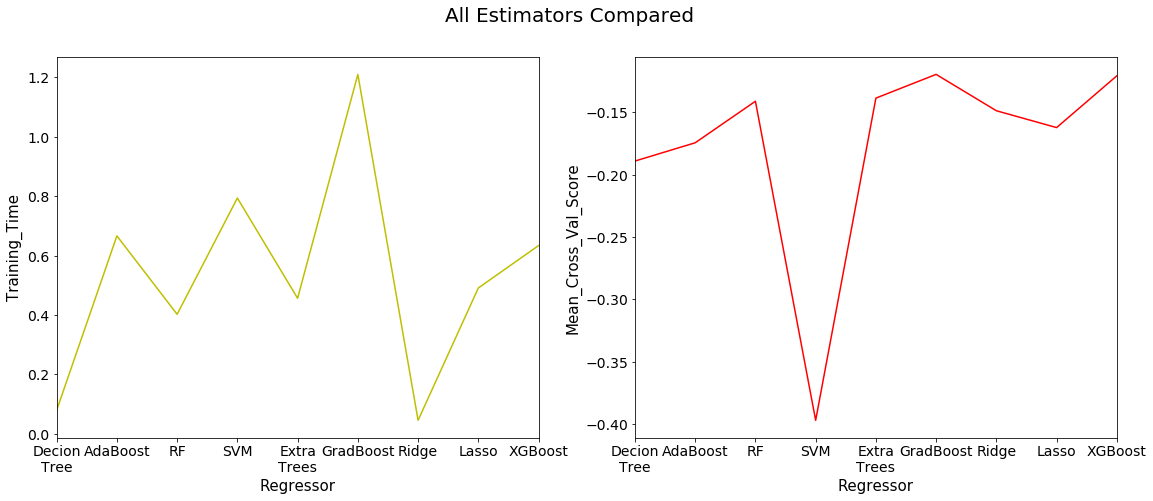

In [131]:
plt.figure(figsize = (19,7))
plt.subplot(121)
results.loc["train_time",:].plot(color = "y", fontsize = 15)
plt.xlabel("Regressor", fontsize = 15)
plt.ylabel("Training_Time", fontsize = 15 )
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(122)
results.loc["mean",:].plot(color = "r")
plt.xlabel("Regressor", fontsize = 15)
plt.ylabel("Mean_Cross_Val_Score", fontsize = 15 )
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.suptitle("All Estimators Compared", fontsize = 20)
save_fig("All_Estimators_Compared")
plt.show()

In [ ]:
lalalaa

### Feature Selection : 
- Obtain feature importances via `RandomForestRegressor`’s `.feature_importances_` method and arrange the feature names in descending order of importance. 
- Calculate number of top `n` features required to satisfy each importance level in `[0.50,0.60,0.70,0.80,0.90, 0.93, 0.96, 0.99, 0.99999]`. 
- 2 lists are made `train_time_list` and `rmsle_list`. 
- For each importance level: 
    - Training set is sliced using top `n` features representing  the importance level. 
    - Training time and Cross Validation Score is found out using the `scores()` function trained on the sliced training set. These are then appended to their specific lists. 
    - A line plot is created, plotting train_time(Increasing Feature Importance) vs mean_cross_val_score generated for each level of importance. 

In [133]:
# Getting Feature Importances 
rnd_importances = rnd_reg.feature_importances_ 

Saving figure Increasing_Feature_Importance_vs_RMSLE


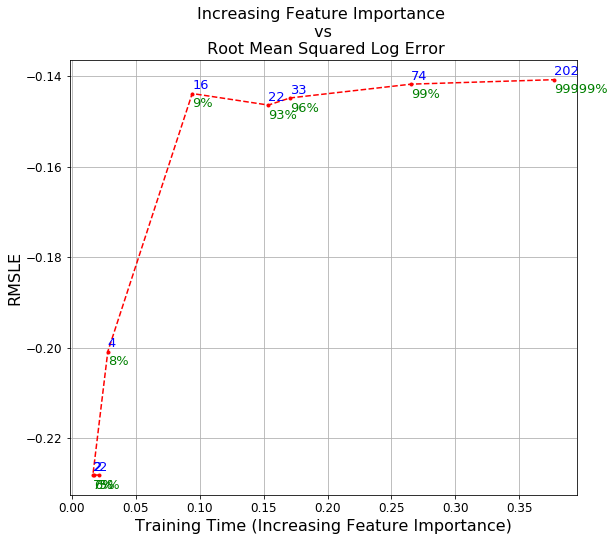

In [365]:
# Index of features in descending order of importance
desc_importances_ix = np.argsort(rnd_importances)[::-1]

# Rearrange importances in descending order
desc_importances = rnd_importances[desc_importances_ix]

# Finding cumulative importances:
cumsum_importances = np.cumsum(desc_importances)

# Creating list of indices to be used to slice
# desc_importances_ix in order to get the right features 
# contributing to a certain importance level from 0.4 to 1. 
imp_features_ix = []
imp_list = [0.50,0.60,0.70,0.80,0.90, 0.93, 0.96, 0.99, 0.99999]
for imp in imp_list:
    imp_features_ix.append((imp, np.argmax(
        cumsum_importances >= imp))) 

# Creating some arrays used for plotting 
train_time_list = []
rmsle_list = [] 

rnd_reg = RandomForestRegressor(random_state = 42)

for imp, feature_ix in imp_features_ix:
    # Get the sliced feature indices for current importance 
    # level
    sliced_features_ix = desc_importances_ix[:feature_ix]
    
    # Fet the names of the sliced features: 
    sliced_features = X_train.columns.values[sliced_features_ix]
    
    # Slice the feature space: 
    X_train_sliced = X_train[sliced_features]
    
    # Training on the model 
    scores_imp = scores(rnd_reg, X_train_sliced, 
                       y_train)
    
    train_time_list.append(scores_imp.loc["train_time"])
    rmsle_list.append(scores_imp.loc["mean"])
plt.figure(figsize = (20,8))
train_time_list = np.array(train_time_list)
rmsle_list = np.array(rmsle_list)

plt.subplot(121)
plt.plot(train_time_list, rmsle_list, "r--.")
for train_time, rmsle, imp in zip(train_time_list,
                          rmsle_list,
                          imp_features_ix):
    plt.text(train_time, rmsle - 0.003, str(imp[0])[2:]+"%", 
             fontsize = 13, color="green", 
             label = "Feature Importance")
    plt.text(train_time, rmsle + 0.001, imp[1]+1, 
             fontsize = 13, color='blue', 
             label = "Feature Importance")
    
plt.xlabel("Training Time (Increasing Feature Importance)", 
           fontsize = 16)
plt.ylabel("RMSLE", fontsize = 16)
plt.title("Increasing Feature Importance \n vs \n \
Root Mean Squared Log Error",
         fontsize = 16)
plt.grid()
save_fig("Increasing_Feature_Importance_vs_RMSLE")

__Note__: There is a small error in the above picture. 80% , 90% and 99.999% have been incorrectly written as 8%, 9% and 99999%, respectively.    

__Observations__: 
- The top 16 features represent 90% importance level. 
- The top 22 features represent 93% importance level and the top 33 features represent 96% importance level. 
- We can see the top 74 features accommodate for approximately 99% of the feature importances. Our original feature space is 265 dimensional. That is more than 3 times 74!
- Further, we see that the performance plateaus after using the top 74 features. Using the top 202 features gives an extremely small improvement while taking 0.20 seconds more to train. 
- We can use these top 74 features to train our top 3 models: 
    - `RandomForestRegressor`, 
    - `ExtraTreesRegressor` and
    - `XGBRegressor ` 

We can also compare each model’s performance when trained on the  reduced dataset with its’ performance when trained on the full dataset. This will tell us if it’s viable to use the top 74 features for the top 3 models.  

#### Training `RandomForestRegressor`, `ExtraTrees`, `XGBoostRegressor` on the top 74 features: 

In [366]:
sliced_features_ix = desc_importances_ix[:74]

# Fet the names of the sliced features: 
sliced_features = X_train.columns.values[sliced_features_ix]

# Slice the feature space with top 16 features: 
X_train_sliced = X_train[sliced_features]  

estimators_list = [tree_reg, rnd_reg, extra_reg,
                   gb_reg, xgb_reg]

# Calulating train time and mean cross val score
# using full training set. 
full_train_time = []
full_cv_score = []
for reg in estimators_list:
    scores_reg = scores(reg, X_train, y_train)
    full_train_time.append(scores_reg.loc["train_time"][0])
    full_cv_score.append(scores_reg.loc["mean"][0])
    
# Calulating train time and mean cross val score
# using reduced training set. 
reduced_train_time = []
reduced_cv_score = []
for reg in estimators_list:
    scores_reg = scores(reg, X_train_sliced, y_train)
    reduced_train_time.append(scores_reg.loc["train_time"][0])
    reduced_cv_score.append(scores_reg.loc["mean"][0])
    

#### Plotting Comparison: 

Saving figure Training_on_Full_vs_Reduced_Training_Set


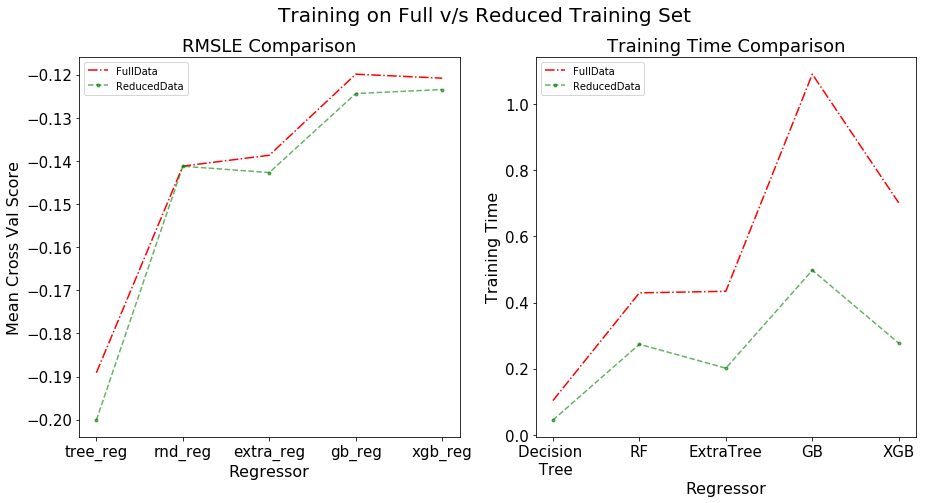

In [451]:
import matplotlib.lines as mlines 
plt.figure(figsize = (15,7))
plt.subplot(121)
plt.plot(full_cv_score, "r-.", label = "FullData")
plt.plot(reduced_cv_score, "g--.", alpha = 0.6, label = "ReducedData")
plt.xticks(np.arange(5), ["tree_reg", "rnd_reg", "extra_reg",
                   "gb_reg", "xgb_reg"], fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("RMSLE Comparison", fontsize = 18)
plt.ylabel("Mean Cross Val Score", fontsize = 16)
plt.xlabel("Regressor", fontsize = 16)
plt.legend()

plt.subplot(122)
plt.plot(full_train_time, "r-.", label = "FullData")
plt.plot(reduced_train_time, "g--.", alpha = 0.6, label = "ReducedData")
plt.xticks(np.arange(5), ["Decision \n Tree", 
                          "RF", "ExtraTree",
                   "GB", "XGB"],
          fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Training Time Comparison", fontsize = 18)
plt.ylabel("Training Time", fontsize = 16)
plt.xlabel("Regressor", fontsize = 16)
plt.suptitle("Training on Full v/s Reduced Training Set", 
            fontsize = 20)
plt.legend()
save_fig("Training_on_Full_vs_Reduced_Training_Set")
plt.show()

__Observations:__ 
- There is a small drop in performance for each of the models except for `RandomForestRegressor`, which makes sense as the top 74 features are derived from this algorithm.  
- The training time for each algorithm is cut by 50% (aprx.). 
- The `DecisionTreeRegressor` shows the most drop in performance, followed by `ExtraTreeRegressor` and `GradientBoostingRegressor`. 
- Again, the top 3 models remain the same, providing a good balance of performance and training time.  

#### Creating the reduced training set: 

In [135]:
# Index of features in descending order of importance
desc_importances_ix = np.argsort(rnd_importances)[::-1]

# Index of top 74 features: 
sliced_features_ix = desc_importances_ix[:74]

# Get the names of the sliced features: 
sliced_features = X_train.columns.values[sliced_features_ix]

# Slice the feature space with top 16 features: 
X_train_reduced = X_train[sliced_features].copy()  

# Shape of reduced training set: 
X_train_reduced.shape

(1456, 74)


## Fine Tuning the top 3 models: 

### Note: Do not run any of the `GridSearchCV` cells. The optimised models have been saved. 

#### Tuning the `RandomForestRegressor`: 

In [143]:
"""DO NOT RUN THIS CELL, OPTIMISED MODEL SAVED. """
from sklearn.model_selection import GridSearchCV

# max samples, # max features
rnd_parameters = {
    "max_features":["auto", "sqrt", "log2"],
    "max_depth":[16,24,32],
    "min_samples_leaf":[10,50,100],
    "min_samples_split":[10,50,100],
    "n_estimators": [500, 1000, 2000, 2500], 
    "bootstrap": [True,False]}

grid_search_rnd = GridSearchCV(rnd_reg, rnd_parameters,
                              cv = 3, scoring = scorer, 
                              verbose = 2)
 
start = time()
grid_search_rnd.fit(X_train_reduced.values, y_train.values)
end = time()
best_fit_time = end - start

best_rnd_reg = grid_search_rnd.best_estimator_
best_rnd_score = grid_search_rnd.best_score_

print("Best Estimator: ")
print(best_rnd_reg)
print("Best Mean Cross-Validated Score:")
print(best_rnd_score)
print("Time taken to find best estimator:", best_fit_time )

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   4.6s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   4.8s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   4.5s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   8.7s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   9.6s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap

[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2500, total=  15.7s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   3.1s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   3.0s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   3.0s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=T

[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=  13.6s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=  13.2s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=  13.2s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500, total=   2.0s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500 
[CV]  b

[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   8.1s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   8.0s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   8.2s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2500, total=  10.1s
[CV] bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=25

[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]

[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2000 
[CV] 

[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=2500, total=   4.5s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   0.9s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   0.9s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=1000 
[CV

[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   5.2s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   5.2s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   5.1s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  bootst

[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   3.9s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500, total=   4.7s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500, total=   4.7s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500 
[CV]  bootst

[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000, total=   3.5s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2500 
[CV]

[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   3.7s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000, total=   7.2s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000, total=   7.1s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000, total=   7.3s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2000 
[CV]  bootstr

[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   2.7s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   2.7s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   2.7s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000, total=   5.5s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=T

[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2500, total=  11.1s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2500, total=  11.4s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500, total=   2.2s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500, total=   2.2s
[CV] bootstrap=True, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500 
[CV]  boo

[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, total=   5.5s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, total=   5.5s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   7.3s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   7.6s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  bootst

[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000, total=   4.4s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000, total=   4.5s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2500 
[CV]  bootst

[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=2000 
[CV]

[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=T

[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500, total=   5.1s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500, total=   5.4s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstra

[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2000, total=   4.4s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=   5.3s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=   5.3s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=   5.4s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=10, n_estimators=500 
[CV] 

[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   3.7s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   3.6s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   4.0s
[CV] bootstrap=True, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=25

[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   6.5s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   6.2s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   6.2s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, total=  12.7s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]

[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   3.2s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   7.3s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   7.6s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  b

[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=2500, total=  10.9s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=2500, total=  11.0s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   2.2s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   2.2s
[CV] bootstrap=True, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]

[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=2000, total=   5.0s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   6.7s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   6.6s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   6.3s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  bootst

[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   4.3s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   4.2s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   4.5s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2500, total=   6.5s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=2500 
[CV]  bootst

[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=1000, total=   6.2s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=2000, total=  12.7s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=2000, total=  11.7s
[CV] bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=2000 
[CV]

[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap

[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=2500, total=   5.6s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=Tr

[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=10, n_estimators=2500, total=   5.0s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=10, n_estimators=2500, total=   5.1s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=10, n_estimators=2500, total=   5.1s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=500, total=   0.9s
[CV] bootstrap=True, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=500 
[CV]  b

[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, total=  29.2s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, total=  28.7s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, total=  30.4s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=  37.8s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]

[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=1000, total=   9.2s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=1000, total=   8.9s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=1000, total=   9.4s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2000, total=  21.1s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2000 
[CV]

[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500, total=   3.5s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500, total=   3.2s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=500, total=   3.5s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=1000, total=   7.0s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=1000 
[

[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2500, total=  20.1s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2500, total=  18.2s
[CV] bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=16, max_features=auto, min_samples_leaf=100, min_samples_split=100, n_estimators=2500, total=  19.4s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.8s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, total=   5.5s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, total=   5.4s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, total=   5.0s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=2500, total=   6.1s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=25

[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   2.7s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   2.8s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   2.7s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2000, total=   5.5s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=20

[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   1.2s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   1.2s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   1.3s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=1000, total=   2.3s
[CV] bootstrap=False, max_depth=16, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators

[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   6.7s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   6.5s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=   6.2s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   1.1s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]

[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   4.3s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   4.2s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=   4.3s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500, total=   5.3s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=2500 
[CV]

[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=1000, total=   2.2s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=1000, total=   2.1s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=1000, total=   2.2s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2000, total=   4.3s
[CV] bootstrap=False, max_depth=16, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=20

[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   6.3s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   6.1s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   6.7s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000, total=  13.8s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1000 
[CV]  boo

[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2500, total=  23.6s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2500, total=  22.7s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=2500, total=  24.3s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   5.0s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=500 
[CV]  b

[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2000, total=  14.6s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2000, total=  14.2s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2000, total=  15.2s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=2500, total=  19.0s
[CV] bootstrap=False, max_depth=24, max_features=auto, min_samples_leaf=100, min_samples_split=10, n_estimators=25

[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   3.4s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   3.1s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   3.6s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, total=   6.6s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 
[CV]

[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   1.2s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   1.3s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   1.2s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000 
[CV]  boo

[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=   6.8s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=   6.4s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=   6.8s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=500 

[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   4.8s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   4.8s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   5.0s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=2500, total=   5.9s
[CV] bootstrap=False, max_depth=24, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estim

[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.3s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.4s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1000, total=   2.4s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, total=   4.9s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=20

[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   1.2s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   1.2s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   1.3s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=1000, total=   2.4s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=1000 
[

[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2500, total=   5.6s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2500, total=   5.7s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=50, n_estimators=2500, total=   5.9s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total=   1.1s
[CV] bootstrap=False, max_depth=24, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=5

[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2000, total=  25.8s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2000, total=  24.3s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2000, total=  26.9s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2500, total=  31.4s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=2500 
[CV]

[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000, total=   9.9s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000, total=   9.4s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=1000, total=   9.8s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=2000, total=  20.6s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=2000 
[CV]

[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500, total=   3.9s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500, total=   3.6s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=500, total=   3.9s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=1000, total=   7.6s
[CV] bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=100, min_samples_split=50, n_estimators=1000 
[

[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   8.4s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   8.3s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   8.3s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   1.5s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  b

[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000, total=   5.3s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000, total=   5.5s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2000, total=   5.8s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2500 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2500, total=   6.5s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=2500 
[CV]

[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=2000, total=   4.6s
[CV] bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=100, min_samples_split=10, n_estimators=20

[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.6s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.7s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000, total=   3.1s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000 
[CV]  boo

[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500, total=   6.7s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500, total=   5.9s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2500, total=   5.6s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500, total=   1.1s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500 
[C

[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2000, total=   4.6s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2000, total=   4.6s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2000, total=   4.8s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=2500, total=   5.9s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=25

[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=1000, total=   2.1s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=1000 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=1000, total=   2.0s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000 
[CV]  bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estimators=2000, total=   4.2s
[CV] bootstrap=False, max_depth=32, max_features=log2, min_samples_leaf=100, min_samples_split=100, n_estim

[Parallel(n_jobs=1)]: Done 1944 out of 1944 | elapsed: 214.8min finished


Best Estimator: 
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=16,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Best Mean Cross-Validated Score:
-0.141454391528
Time taken to find best estimator: 12897.51229095459


In [146]:
"""DO NOT RUN THIS CELL, OPTIMISED MODEL SAVED. """
# Saving the model
from sklearn.externals import joblib
joblib.dump(best_rnd_reg, "best_rnd_reg.pkl")
# best_rnd_reg_loaded = joblib.load("best_rnd_reg.pkl")

['best_rnd_reg.pkl']

#### Tuning the `ExtraTreesRegressor`: 

In [373]:
"""DO NOT RUN THIS CELL, OPTIMISED MODEL SAVED. """

extra_parameters = {
    "max_features":["auto", "sqrt",],
    "max_depth":[16,24],
    "min_samples_leaf":[10,50],
    "min_samples_split":[10,50],
    "n_estimators": [500, 1500, 2500], }

grid_search_extra = GridSearchCV(extra_reg, extra_parameters,
                              cv = 3, scoring = scorer, 
                              verbose = 1.5)
 
start = time()
grid_search_extra.fit(X_train_reduced.values, y_train.values)
end = time()
best_fit_time = end - start

best_extra_reg = grid_search_extra.best_estimator_
best_extra_score = grid_search_extra.best_score_

print("Best Estimator: ")
print(best_extra_reg)
print("Best Mean Cross-Validated Score:")
print(best_extra_score)
print("Time taken to find best estimator:", best_fit_time )

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   2.5s
[CV] max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   2.6s
[CV] max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   2.7s
[CV] max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   7.6s
[CV] max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   7.5s
[CV] max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   7.3s
[CV] max_depth=16, max_featu

[CV]  max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   2.8s
[CV] max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500 
[CV]  max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1500, total=   2.9s
[CV] max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   4.6s
[CV] max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   4.6s
[CV] max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=   4.8s
[CV] max_depth=16, max_fe

[CV]  max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=  12.1s
[CV] max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2500 
[CV]  max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2500, total=  12.1s
[CV] max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   2.0s
[CV] max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   2.0s
[CV] max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  max_depth=24, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   2.0s
[CV] max_depth=24, max_features

[CV]  max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   0.9s
[CV] max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500 
[CV]  max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500, total=   0.9s
[CV] max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1500 
[CV]  max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1500, total=   2.6s
[CV] max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1500 
[CV]  max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1500, total=   2.6s
[CV] max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1500 
[CV]  max_depth=24, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=1500, total=   2.6s
[CV] max_depth=24, max_featu

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 10.4min finished


Best Estimator: 
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=16,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=10, min_samples_split=10,
          min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
          oob_score=False, random_state=42, verbose=0, warm_start=False)
Best Mean Cross-Validated Score:
-0.142207800168
Time taken to find best estimator: 641.0849792957306


In [374]:
"""DO NOT RUN THIS CELL, OPTIMISED MODEL SAVED. """
# Saving the model
from sklearn.externals import joblib
joblib.dump(best_extra_reg, "best_extra_reg.pkl")
# best_extra_reg_loaded = joblib.load("best_extra_reg.pkl")

['best_extra_reg.pkl']

#### Tuning the `XGBRegressor`: 

In [369]:
"""DO NOT RUN THIS CELL, OPTIMISED MODEL SAVED. """
xgb_parameters = xgb_parameters = {
    "learning_rate":[0.009,0.081,1.0], 
    "min_child_weight":[1,10,50],
    "max_depth":[8,16],
    "n_estimators": [500, 1500, 2500],
    "gamma":[0.05, 0.08, 0.1], 
    }

#     "subsample": [0.55, 0.75, 0.95, 1], 
grid_search_xgb = GridSearchCV(xgb_reg, xgb_parameters,
                              cv = 3, scoring = scorer, 
                             verbose = 1)

start = time()
grid_search_xgb.fit(X_train_reduced.values, y_train.values)
best_fit_time = end - start
best_fit_time = end - start

best_xgb_reg = grid_search_xgb.best_estimator_
best_xgb_score = grid_search_xgb.best_score_

print("Best Estimator: ")
print(best_xgb_reg)
print("Best Mean Cross-Validated Score:")
print(best_xgb_score)
print("Time taken to find best estimator:", best_fit_time)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed: 80.9min finished


Best Estimator: 
XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.05, learning_rate=0.009, max_delta_step=0, max_depth=8,
       min_child_weight=10, missing=None, n_estimators=1500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)
Best Mean Cross-Validated Score:
-0.125525284699
Time taken to find best estimator: 4860.665023803711


In [370]:
"""DO NOT RUN THIS CELL, OPTIMISED MODEL SAVED. """
# Saving the model
from sklearn.externals import joblib
joblib.dump(best_xgb_reg, "best_xgb_reg.pkl")
# best_xgb_reg_loaded = joblib.load("best_xgb_reg.pkl")

['best_xgb_reg.pkl']

## Retrieving the optimised models: 

In [136]:
from sklearn.externals import joblib
best_xgb_reg = joblib.load("best_xgb_reg.pkl")
best_rnd_reg = joblib.load("best_rnd_reg.pkl")
best_extra_reg = joblib.load("best_extra_reg.pkl")

#### Comparing default models with optimised models: 

In [453]:
# Storing default mean cross validation scores 
default_mean_cv = []
default_estimators_list = [rnd_reg, extra_reg,  xgb_reg]
for reg in default_estimators_list:
    scores_reg = scores(reg, X_train_reduced.values, y_train.values)
    mean_cv = scores_reg.loc["mean"][0]
    default_mean_cv.append(mean_cv)    

# Storing best mean cross validation scores
best_mean_cv = []
best_estimators_list = [best_rnd_reg, best_extra_reg,  best_xgb_reg]
for reg in best_estimators_list:
    scores_reg = scores(reg, X_train_reduced.values, y_train.values)
    mean_cv = scores_reg.loc["mean"][0]
    best_mean_cv.append(mean_cv)

Saving figure Comparing_default_vs_best_estimators


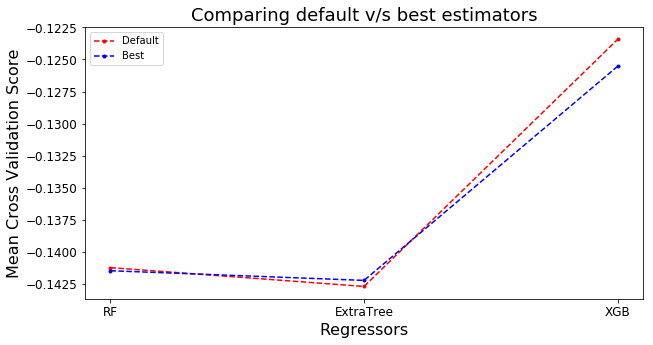

In [455]:
plt.figure(figsize = (10,5))
plt.plot(default_mean_cv, "r--.", label = "Default")
plt.plot(best_mean_cv, "b--.", label = "Best")
plt.title("Comparing default v/s best estimators", fontsize = 18)
plt.xlabel("Regressors", fontsize = 16)
plt.ylabel("Mean Cross Validation Score", fontsize = 16)
plt.xticks(np.arange(3), [  "RF", "ExtraTree", "XGB"])
plt.legend()
save_fig("Comparing_default_vs_best_estimators")
plt.show()

## Stacking Models:   

I would like to thank [Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) for providing the code for stacking process. Brilliant! 
There are two types of stacking that have been performed. For each, a class has been built.   
Each class has these three base classes:  
- `BaseEstimator`: Base class for all estimators in `Scikit-Learn`. Not adding `*args` or `**kargs` in the __init__ method  gives access to two methods:
`get_params()` and 
`set_params()`, useful for hyperparameter tuning.
- `RegressorMixin`: `Mixin` class for all regression  estimators in scikit-learn. Provides a `score` function  which returns the coefficient of determination or R2 score. 
- `TransformerMixin`: `Mixin` class for all transformers  in Scikit-Learn. Provides a `fit_transform` function.  


#### Simple Stacking Approach:    
This approach just involves predicting using a clone from each base model. And then averaging the predictions from each to arrive at a final answer. 
- The class `AveragingModels` takes in a set of base-models. 
- It's `fit` funciton: 
    - creates a list of clones of the base-models. Then, it fits the clones to training data. 
- The `predict` function:
    - Creates a stack of columns, shaped `m` X `n_m`, where `m` is the number of predictions and `n_m` is the number of clone-base models being used. 
    - In other words, we get `n_m` predictions for each instance. 
    - Returns the average of predictions made by each clone-base models, for each instance. 

In [138]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.base import RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, 
                    TransformerMixin):  
    def __init__(self, models):
        self.models = models
        
    def fit(self, X,y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_: 
            model.fit(X,y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis = 1)

#### Plotting a comparison of mean cross validation scores for the top 3 models vs the averaged model: 

In [473]:
averaged_models = AveragingModels(models = [best_rnd_reg, best_extra_reg,
                                          best_xgb_reg])

In [475]:
# Storing mean cross validation scores 
mean_cv_average = []
for model in [best_rnd_reg, 
              best_extra_reg, 
              best_xgb_reg, averaged_models]:
    mean_cv_average.append(scores(model, X_train_reduced.values,
                    y_train.values ).loc["mean"][0])

Saving figure Base_Model_Predictions_vs_Averaged_Model_Predictions


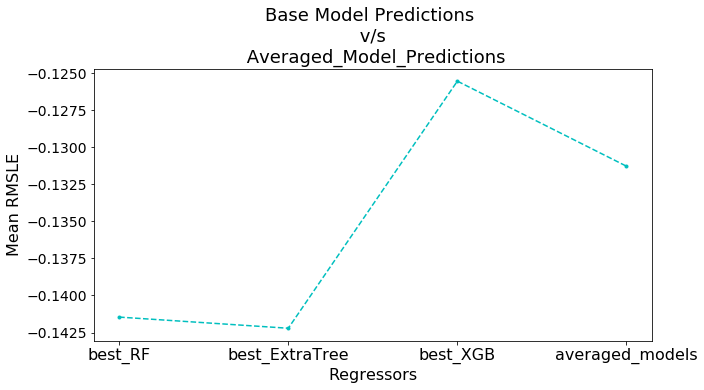

In [476]:
plt.figure(figsize = (10,5))
plt.plot(mean_cv_average, "c--.")
plt.xticks(range(4),
           ["best_RF", "best_ExtraTree", 
            "best_XGB", "averaged_models"],
          fontsize = 16)
plt.yticks(fontsize = 14)
plt.ylabel("Mean RMSLE", fontsize = 16)
plt.xlabel("Regressors", fontsize = 16)
plt.title("Base Model Predictions \n v/s \n Averaged_Model_Predictions", 
         fontsize = 18)
save_fig("Base_Model_Predictions_vs_Averaged_Model_Predictions")
plt.show()

The average model does not perform as well as the the `XGBRegressor`. We can look into more advanced Stacking techniques. 

#### Stacking : Training a Meta-Learner: 

- The class `StackedAveragedModels` takes in 3 arguments.
    - A list of `base-models` to be used.
    - A `meta_model` or blender.
    - `n-folds`, the number of folds you want to divide the training set into.
- The `fit()` method:
    - Creates a list, `self.base_models_` with `n_m` empty lists where `n_m` is the number of base-models being used.
    - Creates a clone of the `meta_model`.
    - Creates a `K-fold` object to split the training instance into `n_folds`.
    - Creates an empty array of `out_of_fold_predictions`. It has rows equal to the number of training examples. It has columns equal to the number of base-models being used (`n_m`).
    - For each base-model:
        - For each train-holdout split given:
            - Make a clone of the model, (called instance).
            - Append it to the its own(`base-model`) list in the `self.base_models_` list.
            -  Fit the `instance` to the current training examples, and then predict on the `holdout` examples.
            - Depending on which `base-model` you use, insert the predictions made on the `holdout` examples to the `out_of_fold_predictions`'s respective (column, indices). This will give you clean predictions for each example, by each base-model.
            - Train the `meta_model` using the `out_of_fold_predictions` as input and the target labels as outputs. 
- The `predict()` method:
    - Takes the cloned-instances of one base-model.
    - Make predictions on the entire test set using all cloned-instances, one by one. Now, you will have `n_cm` predictions for each example in the `test set`, where `n_cm` is the number of cloned-instances per base-model.
    - Take the average over predictions made by cloned-instances, for each example in the `test set`. This will account for predictions made by one base-model.
    - Perform the above steps for each base model, returning the average prediction made by cloned-instance for each. This will give us `n_m` predictions for each example in the test set, where `n_m` is the number of base-models used. These are also known as `meta_features`.
    - Return a prediction made by the `meta_model`, using the meta_features as input.

In [139]:
from sklearn.model_selection import KFold
class StackingAveragedModels(BaseEstimator, RegressorMixin,
                             TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        
        self.meta_model_ = clone(self.meta_model)
        
        kfold = KFold(n_splits=self.n_folds, 
                      shuffle=True,
                      random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], 
                                            len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        
        self.meta_model_.fit(out_of_fold_predictions, y)
        
        return self
    
    def predict(self, X): 
        meta_features = np.column_stack([
            np.column_stack([
                model.predict(X) for model in base_models]
            ).mean(axis=1) for base_models in self.base_models_ ])      
        return self.meta_model_.predict(meta_features)

#### Training the meta model: 

In [140]:
lasso_meta = make_pipeline(RobustScaler(), 
                          Lasso(alpha =0.0005, 
                                random_state=42))

stacked_averaged_models_lasso = StackingAveragedModels(
    base_models = [best_rnd_reg, best_xgb_reg, best_extra_reg], 
meta_model = lasso_meta) 

# Using the `scores()` function to find out the 
# cross validation scores when stacked_averaged_models_lasso
# is used. 
scores(stacked_averaged_models_lasso,
       X_train_reduced.values, y_train.values)

,0
cv1,-0.118544
cv2,-0.134785
cv3,-0.116772
mean,-0.123367
std_dev,0.008106
train_time,170.957294


#### Comparing the base models' performance with `StackedAverageModel`'s performance: 

In [479]:
# Storing mean cross validation scores 
mean_cv_stacked = []
for model in [best_rnd_reg, best_extra_reg, best_xgb_reg, 
              stacked_averaged_models_lasso]:
    mean_cv_stacked.append(scores(model, X_train_reduced.values,
                    y_train.values ).loc["mean"][0])  

Saving figure Base_Model_Predictions_vs_StackingAveragedModels_Predictions


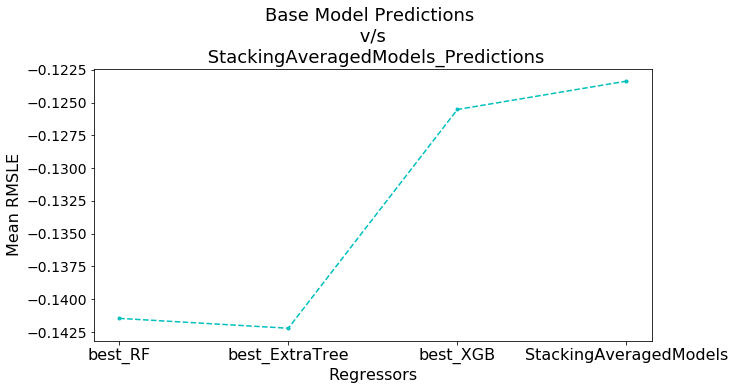

In [485]:
plt.figure(figsize = (10,5))
plt.plot(mean_cv_stacked, "c--.")
plt.xticks(range(4),["best_RF", 
                     "best_ExtraTree", 
                     "best_XGB", 
                     "StackingAveragedModels"], 
          fontsize = 16)
plt.yticks(fontsize = 14)
plt.ylabel("Mean RMSLE", fontsize = 16)
plt.xlabel("Regressors", fontsize = 16)
plt.title("Base Model Predictions \n v/s \n StackingAveragedModels_Predictions", 
         fontsize = 18)
save_fig("Base_Model_Predictions_vs_StackingAveragedModels_Predictions")
plt.show()

### Checking the $R^2$ score on the training set: 

In [149]:
from sklearn.metrics import r2_score
y_train_pred = stacked_averaged_models_lasso.predict(
    X_train_reduced.values)
r2_score(y_train_pred,y_train)

0.98153015816029709

### Free form Visualisations: 

Saving figure Predicted_vs_RealValues


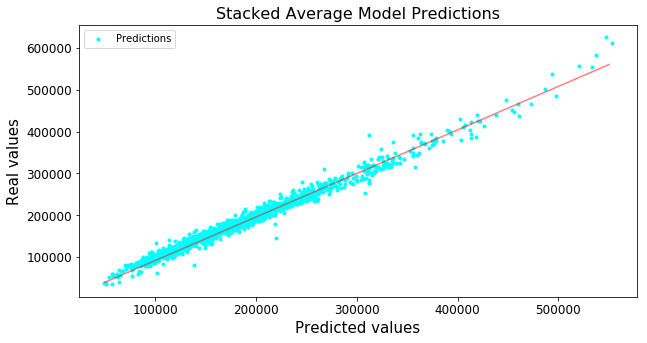

In [181]:
# Plot predictions
plt.figure(figsize = (10,5))
plt.scatter(y_train_pred, 
            y_train, c = "cyan", 
            marker = ".", label = "Predictions", alpha = 1)
plt.title("Stacked Average Model Predictions", 
         fontsize = 16)
plt.xlabel("Predicted values", fontsize = 15)
plt.ylabel("Real values", fontsize = 15)
plt.legend(loc = "upper left")
plt.plot([50000, 550000], [40000, 560000], c = "red", alpha = 0.5)
save_fig("Predicted_vs_RealValues")
plt.show()

### Predicting on the test set: 

#### Reduce the `test_set`: 

In [142]:
X_test_reduced = X_test[X_train_reduced.columns]
X_test_reduced.shape

(1459, 74)

#### Predict on the test set using `stacked_averaged_models_lasso`: 

In [143]:
test_pred = stacked_averaged_models_lasso.predict(
    X_test_reduced.values)
# Convert all predictions to int32
test_pred = test_pred.astype(np.int32)

#### Retrieve `"Id"` column: 

In [144]:
X_test = pd.read_csv("test.csv")
test_ids = X_test["Id"].astype(np.int32)

#### Create final submission dataframe: 

In [145]:
submission = pd.DataFrame(np.c_[test_ids, test_pred],
                         columns = ['Id', 'SalePrice'])
submission.head()

,Id,SalePrice
0,1461,118719
1,1462,157844
2,1463,183561
3,1464,188868
4,1465,188712


#### Transfer submission to `csv` file: 

In [146]:
submission.to_csv("submission_stacked_lasso.csv", index = False)